# ===============================================================
# 1st Step: Data Pre-processing and EDA
# ===============================================================

* Explored the dataset having alot of missy stuff and col's
* Remove text other than Indonesian language
* drop col's having missing values
* drop rows having missing values (in full_text col)
* Exploratory Data Analysis 
* Clean the text Column(full_text)

  `lowercase everything`
  
  `remove URLs`
  
  `remove mentions`
  
  `remove hashtags`
  
  `remove numbers` 
  
  `remove punctuation`
  
  `normalize spaces`

* again do some important EDA

In [1]:
import pandas as pd
# pd.read_csv(r"C:\Users\lenovo\Desktop\Sentiment analysis dataset.csv")

df = pd.read_csv(r"C:\Users\lenovo\Desktop\Sentiment Analysis\datasets\dataset_bersih_latest_raw.csv")
df.head()

conversation_id_str                 created_at  favorite_count  \
0                  NaN  2023-01-01 00:19:45+00:00               0   
1                  NaN  2023-01-01 00:32:02+00:00               0   
2                  NaN  2023-01-01 02:35:01+00:00               0   
3                  NaN  2023-01-01 03:24:03+00:00               0   
4                  NaN  2023-01-01 04:36:34+00:00               1   

                                           full_text  \
0  @roses_man Biar horangkayah pake mobil listrik...   
1  Bulan Depan Suzuki Luncurkan 3 Produk Baru Sal...   
2  @jokowi Kenangan baik di 2022 akan disambut de...   
3  [Mobil Listrik/Self Driving] Kendaraan listrik...   
4  Mobil Listrik Kloningan Daihatsu Ini Siap Masu...   

                              id_str image_url in_reply_to_screen_name lang  \
0  160934358613454996348478165090304       NaN                     NaN   in   
1  160934667732398999397968505733120       NaN                     NaN   in   
2  160937762459341993611364283711488       NaN                     NaN   in   
3  160938996765412003888405204172800       NaN                     NaN   in   
4  160999999999999997290450088099840       NaN                     NaN   in   

             location  quote_count  reply_count  retweet_count  \
0                 NaN            0            0              0   
1                 NaN            0            0              0   
2                 NaN            0            0              0   
3           unlocated            0            1              0   
4  Jakarta, Indonesia            0            0              0   

                                           tweet_url  \
0  https://x.com/Ozy_MoTo/status/1609343586134556674   
1  https://x.com/nasionalisme_co/status/160934667...   
2  https://x.com/vivas_almar/status/1609377624593...   
3  https://x.com/pekerja_paksa/status/16093899676...   
4    https://x.com/otosia/status/1609408213744783361   

                         user_id_str         username   mentions  \
0  126236966622519003598589175791616         Ozy_MoTo  roses_man   
1                         3178203738  nasionalisme_co        NaN   
2   13488590028351999140924651208704      vivas_almar     jokowi   
3  121077648168248000906625420361728    pekerja_paksa        NaN   
4                          117686358           otosia        NaN   

   mention_count           source     target  
0            1.0         Ozy_MoTo  roses_man  
1            0.0  nasionalisme_co        NaN  
2            1.0      vivas_almar     jokowi  
3            0.0    pekerja_paksa        NaN  
4            0.0           otosia        NaN

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23426 entries, 0 to 23425
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      13853 non-null  float64
 1   created_at               23426 non-null  object 
 2   favorite_count           23426 non-null  int64  
 3   full_text                23425 non-null  object 
 4   id_str                   23426 non-null  object 
 5   image_url                2730 non-null   object 
 6   in_reply_to_screen_name  5735 non-null   object 
 7   lang                     23426 non-null  object 
 8   location                 6070 non-null   object 
 9   quote_count              23426 non-null  int64  
 10  reply_count              23426 non-null  int64  
 11  retweet_count            23426 non-null  int64  
 12  tweet_url                23426 non-null  object 
 13  user_id_str              23426 non-null  object 
 14  username              

In [3]:
df.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username', 'mentions', 'mention_count', 'source',
       'target'],
      dtype='object')

In [4]:
df['full_text'].duplicated().sum()


139

In [5]:
df.isnull().sum()

conversation_id_str         9573
created_at                     0
favorite_count                 0
full_text                      1
id_str                         0
image_url                  20696
in_reply_to_screen_name    17691
lang                           0
location                   17356
quote_count                    0
reply_count                    0
retweet_count                  0
tweet_url                      0
user_id_str                    0
username                    7069
mentions                   19556
mention_count              13853
source                     13853
target                     19556
dtype: int64

In [6]:
# remove cols having missing values
df = df.drop(columns=['conversation_id_str','image_url','in_reply_to_screen_name','location','username','mentions','mention_count','source','target'])

In [7]:
df.isnull().sum()

created_at        0
favorite_count    0
full_text         1
id_str            0
lang              0
quote_count       0
reply_count       0
retweet_count     0
tweet_url         0
user_id_str       0
dtype: int64

In [8]:
df['lang'].value_counts()

lang
in     23222
zxx       80
da        28
en        25
qme       10
de         9
tl         7
ht         6
tr         6
und        5
cs         4
eu         4
ja         4
no         4
nl         3
cy         2
ko         2
hu         1
it         1
lt         1
et         1
pl         1
Name: count, dtype: int64

In [9]:
# remove text which are in other than indo language; keep the indonesian language only
df = df[df['lang'] == 'in']

In [11]:
# Drop any rows with missing text
df = df.dropna(subset=['full_text']).reset_index(drop=True)

# Confirm shape after cleaning
print("Shape after dropping NaN:", df.shape)

df.isnull().sum()

Shape after dropping NaN: (23221, 10)


created_at        0
favorite_count    0
full_text         0
id_str            0
lang              0
quote_count       0
reply_count       0
retweet_count     0
tweet_url         0
user_id_str       0
dtype: int64

In [13]:
df['full_text'].duplicated().sum()

127

In [14]:
df.describe()

favorite_count   quote_count   reply_count  retweet_count
count    23221.000000  23221.000000  23221.000000   23221.000000
mean        25.005039      0.796348      2.817536       6.275526
std        379.217931     14.313627     29.011775     105.561957
min          0.000000      0.000000      0.000000       0.000000
25%          0.000000      0.000000      0.000000       0.000000
50%          0.000000      0.000000      0.000000       0.000000
75%          1.000000      0.000000      1.000000       0.000000
max      22987.000000   1389.000000   1408.000000    8191.000000

In [15]:
# EDA for Indonesian Twitter sentiment project
# Run in Colab / local Python (requires pandas, matplotlib, seaborn, wordcloud, nltk)
# Installs (uncomment in Colab):
# !pip install wordcloud emoji nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import emoji
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

sns.set(style='whitegrid', context='talk', palette='muted')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:

print("Initial rows:", df.shape[0])
print(df.columns.tolist())

Initial rows: 23221
['created_at', 'favorite_count', 'full_text', 'id_str', 'lang', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str']


In [17]:
# -------------------------
# 1. Basic structure & missingness
# -------------------------
print("\n=== Basic info ===")
df.info()


=== Basic info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23221 entries, 0 to 23220
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      23221 non-null  object
 1   favorite_count  23221 non-null  int64 
 2   full_text       23221 non-null  object
 3   id_str          23221 non-null  object
 4   lang            23221 non-null  object
 5   quote_count     23221 non-null  int64 
 6   reply_count     23221 non-null  int64 
 7   retweet_count   23221 non-null  int64 
 8   tweet_url       23221 non-null  object
 9   user_id_str     23221 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.8+ MB


In [18]:


print("\nMissing values per column:")
display(df.isnull().sum())

print("\nDuplicate full_text count:", df['full_text'].duplicated().sum())


Missing values per column:


created_at        0
favorite_count    0
full_text         0
id_str            0
lang              0
quote_count       0
reply_count       0
retweet_count     0
tweet_url         0
user_id_str       0
dtype: int64


Duplicate full_text count: 127


In [19]:
# -------------------------
# 2. Convert created_at to datetime (if available)
# -------------------------
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    print("\ncreated_at nulls after to_datetime:", df['created_at'].isnull().sum())



created_at nulls after to_datetime: 0


In [20]:
df.head(3)

created_at  favorite_count  \
0 2023-01-01 00:19:45+00:00               0   
1 2023-01-01 00:32:02+00:00               0   
2 2023-01-01 02:35:01+00:00               0   

                                           full_text  \
0  @roses_man Biar horangkayah pake mobil listrik...   
1  Bulan Depan Suzuki Luncurkan 3 Produk Baru Sal...   
2  @jokowi Kenangan baik di 2022 akan disambut de...   

                              id_str lang  quote_count  reply_count  \
0  160934358613454996348478165090304   in            0            0   
1  160934667732398999397968505733120   in            0            0   
2  160937762459341993611364283711488   in            0            0   

   retweet_count                                          tweet_url  \
0              0  https://x.com/Ozy_MoTo/status/1609343586134556674   
1              0  https://x.com/nasionalisme_co/status/160934667...   
2              0  https://x.com/vivas_almar/status/1609377624593...   

                         user_id_str  
0  126236966622519003598589175791616  
1                         3178203738  
2   13488590028351999140924651208704


Text length (words) summary:


count    23221.000000
mean        22.583222
std         12.341370
min          2.000000
25%         12.000000
50%         20.000000
75%         33.000000
max         71.000000
Name: text_len_words, dtype: float64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


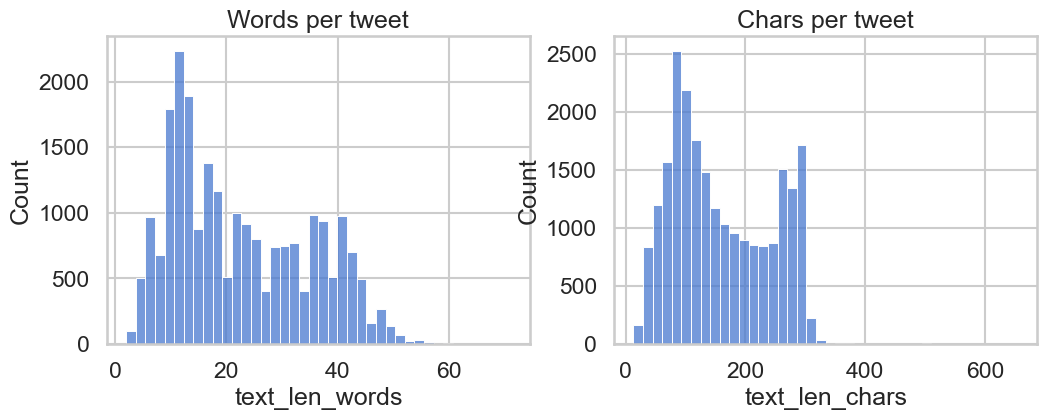


Tweets with URL: 10520 / 23221
Tweets with mention: 8967 / 23221
Tweets with hashtag: 2794 / 23221
Tweets with emoji: 148 / 23221


In [21]:

# -------------------------
# 3. Text-level diagnostics
# -------------------------
def extract_urls(text):
    return re.findall(r'http\S+|www\.\S+', str(text))

def count_hashtags(text):
    return len(re.findall(r'#\w+', str(text)))

def count_mentions(text):
    return len(re.findall(r'@\w+', str(text)))

def extract_emojis(text):
    return [c for c in str(text) if c in emoji.EMOJI_DATA]

def clean_for_tokenization(text):
    t = str(text).lower()
    t = re.sub(r'http\S+|www\.\S+', ' ', t)
    t = re.sub(r'@\w+', ' ', t)
    t = re.sub(r'#\w+', ' ', t)
    t = re.sub(r'[^\w\s]', ' ', t)   # keep alphanum + underscores
    t = re.sub(r'\d+', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

# engineer columns
df['text_len_chars'] = df['full_text'].astype(str).apply(len)
df['text_len_words'] = df['full_text'].astype(str).apply(lambda x: len(str(x).split()))
df['n_urls'] = df['full_text'].apply(lambda x: len(extract_urls(x)))
df['n_hashtags'] = df['full_text'].apply(count_hashtags)
df['n_mentions'] = df['full_text'].apply(count_mentions)
df['n_emojis'] = df['full_text'].apply(lambda x: len(extract_emojis(x)))
df['clean_for_tokens'] = df['full_text'].apply(clean_for_tokenization)

print("\nText length (words) summary:")
display(df['text_len_words'].describe())

# quick histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['text_len_words'], bins=40)
plt.title("Words per tweet")

plt.subplot(1,2,2)
sns.histplot(df['text_len_chars'], bins=40)
plt.title("Chars per tweet")
plt.show()

# number of tweets with URLs, mentions, hashtags, emojis
print("\nTweets with URL:", (df['n_urls']>0).sum(), "/", len(df))
print("Tweets with mention:", (df['n_mentions']>0).sum(), "/", len(df))
print("Tweets with hashtag:", (df['n_hashtags']>0).sum(), "/", len(df))
print("Tweets with emoji:", (df['n_emojis']>0).sum(), "/", len(df))

In [22]:
# -------------------------
# 4. Top tokens & n-grams (Indonesian stopwords)
# -------------------------
ind_stop = set(stopwords.words('indonesian')) if 'indonesian' in stopwords.fileids() else set()
# fallback: english stopwords if indonesian not present
if len(ind_stop)==0:
    ind_stop = set(stopwords.words('english'))

def get_top_n_words(corpus, n=40, stopwords_set=ind_stop):
    c = Counter()
    for doc in corpus:
        for token in str(doc).split():
            token = token.strip().lower()
            if token=='' or token in stopwords_set: 
                continue
            c[token] += 1
    return c.most_common(n)

top_words = get_top_n_words(df['clean_for_tokens'], n=40)
print("\nTop tokens (raw counts):")
display(top_words[:30])



Top tokens (raw counts):


[('mobil', 25169),
 ('listrik', 24645),
 ('yg', 3913),
 ('indonesia', 2734),
 ('motor', 2487),
 ('china', 1859),
 ('ya', 1831),
 ('beli', 1697),
 ('aja', 1665),
 ('ga', 1660),
 ('subsidi', 1600),
 ('kendaraan', 1587),
 ('harga', 1417),
 ('ev', 1402),
 ('gak', 1311),
 ('nya', 1205),
 ('amp', 1157),
 ('baterai', 1149),
 ('kalo', 1147),
 ('wuling', 1126),
 ('udah', 1056),
 ('orang', 1053),
 ('rp', 1035),
 ('pake', 1016),
 ('dagang', 976),
 ('bikin', 938),
 ('byd', 907),
 ('air', 891),
 ('rumah', 854),
 ('negara', 823)]

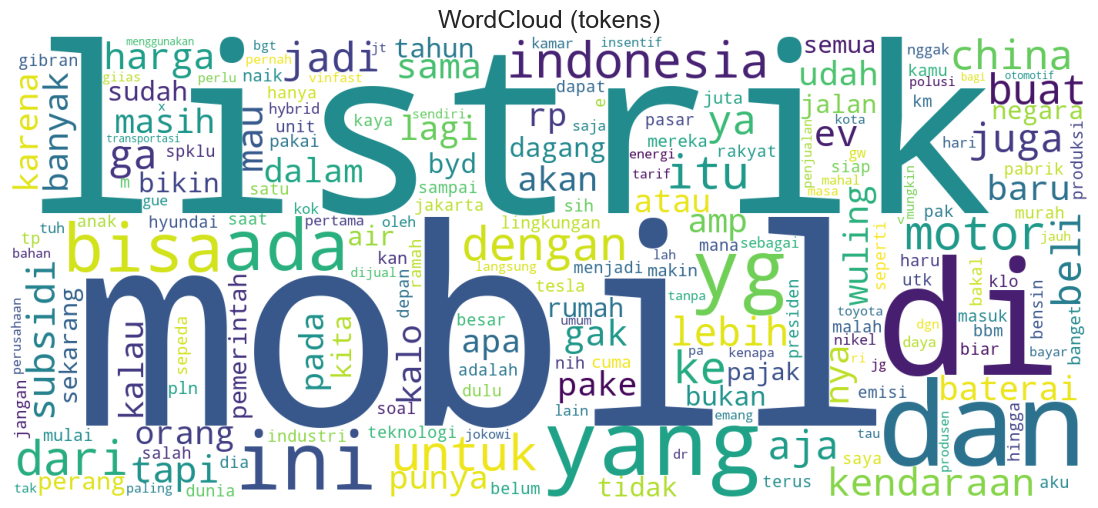

In [23]:
# Wordcloud (visual)
text_for_wc = " ".join(df['clean_for_tokens'].astype(str).values)
wc = WordCloud(width=1400, height=600, background_color='white', collocations=False).generate(text_for_wc)
plt.figure(figsize=(14,6)); plt.imshow(wc); plt.axis('off'); plt.title("WordCloud (tokens)"); plt.show()


In [24]:
df.head(3)

created_at  favorite_count  \
0 2023-01-01 00:19:45+00:00               0   
1 2023-01-01 00:32:02+00:00               0   
2 2023-01-01 02:35:01+00:00               0   

                                           full_text  \
0  @roses_man Biar horangkayah pake mobil listrik...   
1  Bulan Depan Suzuki Luncurkan 3 Produk Baru Sal...   
2  @jokowi Kenangan baik di 2022 akan disambut de...   

                              id_str lang  quote_count  reply_count  \
0  160934358613454996348478165090304   in            0            0   
1  160934667732398999397968505733120   in            0            0   
2  160937762459341993611364283711488   in            0            0   

   retweet_count                                          tweet_url  \
0              0  https://x.com/Ozy_MoTo/status/1609343586134556674   
1              0  https://x.com/nasionalisme_co/status/160934667...   
2              0  https://x.com/vivas_almar/status/1609377624593...   

                         user_id_str  text_len_chars  text_len_words  n_urls  \
0  126236966622519003598589175791616             114              15       0   
1                         3178203738             118              13       2   
2   13488590028351999140924651208704             190              30       0   

   n_hashtags  n_mentions  n_emojis  \
0           0           1         0   
1           0           0         0   
2           0           1         0   

                                    clean_for_tokens  
0  biar horangkayah pake mobil listrik subsidi ho...  
1  bulan depan suzuki luncurkan produk baru salah...  
2  kenangan baik di akan disambut dengan kebijaka...

C:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(



Top 25 Bigrams:
mobil listrik: 19273
motor listrik: 1244
beli mobil: 1048
kendaraan listrik: 909
subsidi mobil: 647
perang dagang: 603
mobil motor: 575
motor mobil: 499
listrik mobil: 473
listrik yg: 471
ramah lingkungan: 464
listrik indonesia: 444
pake mobil: 383
baterai mobil: 365
air ev: 360
rp juta: 325
listrik wuling: 319
listrik china: 308
penjualan mobil: 261
sepeda listrik: 260
harga mobil: 258
wuling air: 247
harga rp: 237
listrik aja: 224
pakai mobil: 224


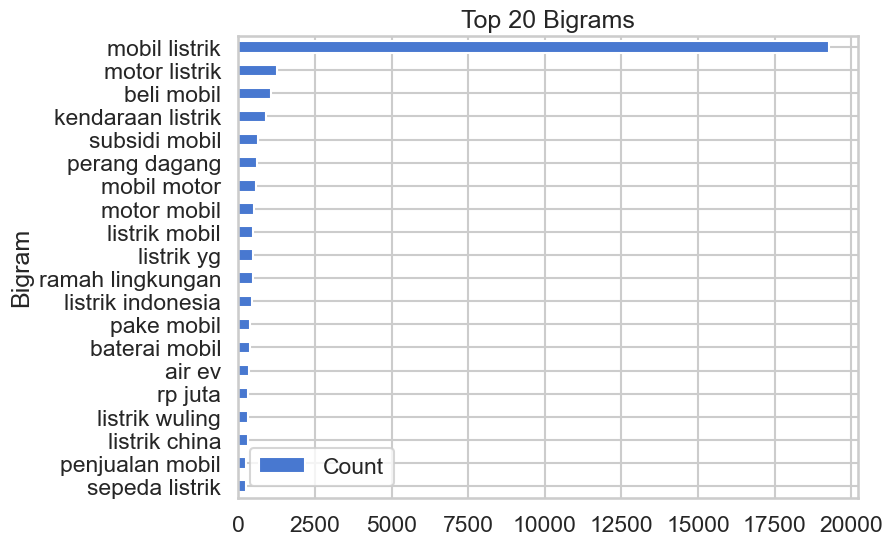

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Make sure stopwords are a list, not a set
ind_stop = list(ind_stop)

# Fit CountVectorizer for bigrams
vectorizer = CountVectorizer(
    ngram_range=(2, 2),
    max_features=200,
    stop_words=ind_stop
)

X2 = vectorizer.fit_transform(df['clean_for_tokens'])
sum_words = np.array(X2.sum(axis=0)).flatten()

bigrams = sorted(
    list(zip(vectorizer.get_feature_names_out(), sum_words)),
    key=lambda x: x[1],
    reverse=True
)[:30]

print("\nTop 25 Bigrams:")
for bigram, count in bigrams[:25]:
    print(f"{bigram}: {int(count)}")
    


import matplotlib.pyplot as plt

bigrams_df = pd.DataFrame(bigrams, columns=['Bigram', 'Count'])
bigrams_df.head(20).plot.barh(x='Bigram', y='Count', figsize=(8,6))
plt.title('Top 20 Bigrams')
plt.gca().invert_yaxis()
plt.show()



favorite_count summary:


count    23221.000000
mean        25.005039
std        379.217931
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      22987.000000
Name: favorite_count, dtype: float64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


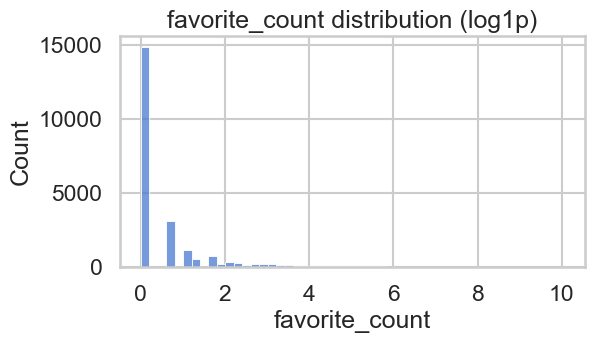


retweet_count summary:


count    23221.000000
mean         6.275526
std        105.561957
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       8191.000000
Name: retweet_count, dtype: float64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


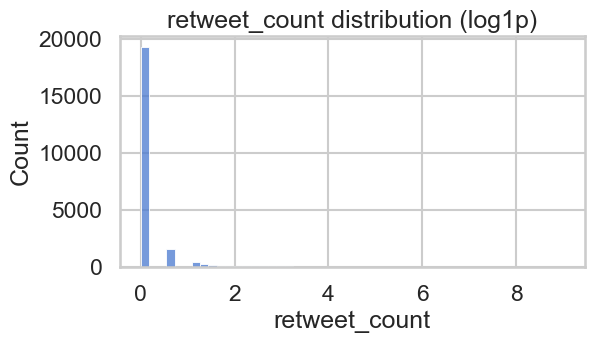


reply_count summary:


count    23221.000000
mean         2.817536
std         29.011775
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1408.000000
Name: reply_count, dtype: float64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


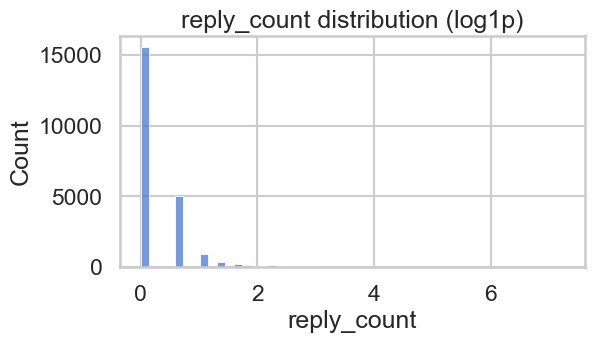


quote_count summary:


count    23221.000000
mean         0.796348
std         14.313627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1389.000000
Name: quote_count, dtype: float64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


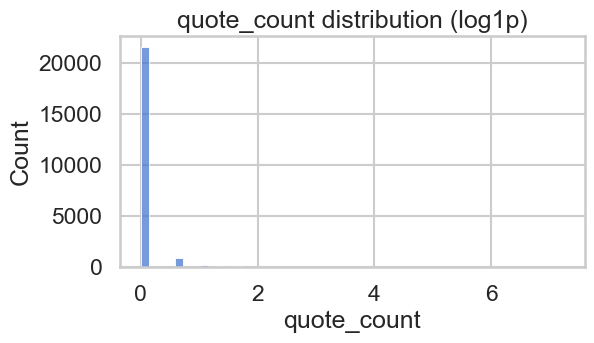

full_text  engagement_sum
10555  Ya karena ga nyaman. Udah mah panas debu-debu ...           31962
3054   Desa tanpa listrik di negeri yang pejabatnya d...           30817
431    Macet Macet Mobil biasa Mobil listrik https://...           27963
19708   RESMI : Presiden Uzbekistan Shavkat Mirziyoye...           19615
13772  @convomf Yg harusnya ditilang itu sepeda listr...           16797
8719   #TanyaMinJess 1.kenapa mobil listrik yang aku ...           14312
6096   Kalau kurang beras ambil dari Sulawesi. Listri...           13662
15012  Video ini sengaja dibagikan pemiliknya ke khal...           13020
9094   Alhamdulillah Ya Allah nanya doang padahal lan...           11060
14374  FREE Naik Taksi Vietnam Baru di JKT Berlaku di...           10272

In [26]:
# -------------------------
# 5. Engagement analysis
# -------------------------
numeric_cols = ['favorite_count','retweet_count','reply_count','quote_count']
for c in numeric_cols:
    if c in df.columns:
        print(f"\n{c} summary:")
        display(df[c].describe())
        # show distribution on log scale (because very skewed)
        plt.figure(figsize=(6,3))
        sns.histplot(np.log1p(df[c]), bins=50)
        plt.title(f"{c} distribution (log1p)")
        plt.show()

# top tweets by engagement
if 'favorite_count' in df.columns and 'retweet_count' in df.columns:
    df['engagement_sum'] = df[['favorite_count','retweet_count','reply_count','quote_count']].sum(axis=1)
    display(df.sort_values('engagement_sum', ascending=False)[['full_text','engagement_sum']].head(10))


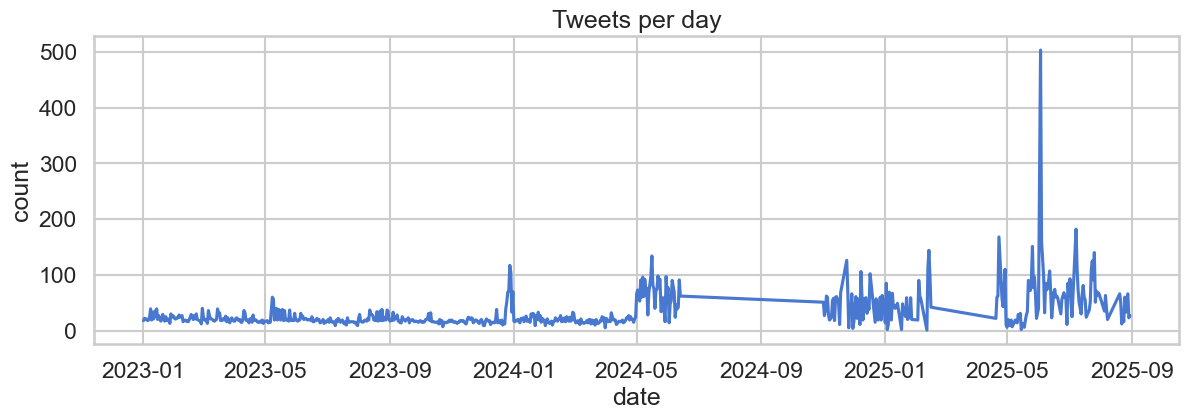

In [27]:
# -------------------------
# 6. Time series (volume) - if datetime exists
# -------------------------
if 'created_at' in df.columns:
    df['date'] = df['created_at'].dt.date
    counts_by_date = df.groupby('date').size()
    plt.figure(figsize=(14,4))
    counts_by_date.plot()
    plt.title('Tweets per day')
    plt.ylabel('count')
    plt.show()


In [29]:
# -------------------------
# 7. User-level diagnostics
# -------------------------
top_users = df['user_id_str'].value_counts().head(20)
print("\nTop 20 users (tweet counts):")
display(top_users)



Top 20 users (tweet counts):


user_id_str
80543284                            685
23343960                            220
41730943                            176
17128975                            162
1450324371583553538                 139
69183155                            138
1578222594                          120
75779836593338303459143989592064    110
759692754985242625                  109
132078023                           108
847372542830444544                  107
1720665183188922368                  96
121640063                            96
18129942                             93
154102750                            92
3042677100                           74
3271146871                           70
231355136                            69
118646322                            69
117686358                            68
Name: count, dtype: int64

In [30]:
# -------------------------
# 8. Basic heuristics for polarity (quick check)
#    — this is NOT a replacement for InSet, only helps sanity-check.
# -------------------------
# small lexicons for quick check (you can extend)
pos_lex = set(["bagus","bagusnya","baguslah","keren","mantap","bagus","suka","senang","bagus","baik","terbaik","sayang"])
neg_lex = set(["jelek","gak","nggak","tidak","buruk","parah","nyesek","nabung","benci","gagal","malu","rusak","jelek"])

def simple_sentiment(text):
    tokens = str(text).lower().split()
    pos = sum(1 for t in tokens if t in pos_lex)
    neg = sum(1 for t in tokens if t in neg_lex)
    if pos>neg: return 'pos_simple'
    if neg>pos: return 'neg_simple'
    return 'neu_simple'

df['simple_lex'] = df['clean_for_tokens'].apply(simple_sentiment)
print("\nSimple lexicon heuristic distribution:")
display(df['simple_lex'].value_counts())


Simple lexicon heuristic distribution:


simple_lex
neu_simple    19910
neg_simple     2380
pos_simple      931
Name: count, dtype: int64

In [31]:

# -------------------------
# 9. Short report (printable summary you can copy)
# -------------------------
print("\n=== Short EDA Summary (copyable) ===")
print(f"Rows: {len(df)}")
print(f"Unique users: {df['user_id_str'].nunique()}")
print(f"Average words per tweet: {df['text_len_words'].mean():.2f}")
print(f"Median words per tweet: {df['text_len_words'].median():.0f}")
print(f"Percent tweets with URLs: {100*(df['n_urls']>0).mean():.1f}%")
print(f"Percent tweets with mentions: {100*(df['n_mentions']>0).mean():.1f}%")
print(f"Percent tweets with hashtags: {100*(df['n_hashtags']>0).mean():.1f}%")
print(f"Percent tweets with emoji: {100*(df['n_emojis']>0).mean():.1f}%")


=== Short EDA Summary (copyable) ===
Rows: 23221
Unique users: 12748
Average words per tweet: 22.58
Median words per tweet: 20
Percent tweets with URLs: 45.3%
Percent tweets with mentions: 38.6%
Percent tweets with hashtags: 12.0%
Percent tweets with emoji: 0.6%


In [32]:
df.head()

created_at  favorite_count  \
0 2023-01-01 00:19:45+00:00               0   
1 2023-01-01 00:32:02+00:00               0   
2 2023-01-01 02:35:01+00:00               0   
3 2023-01-01 03:24:03+00:00               0   
4 2023-01-01 04:36:34+00:00               1   

                                           full_text  \
0  @roses_man Biar horangkayah pake mobil listrik...   
1  Bulan Depan Suzuki Luncurkan 3 Produk Baru Sal...   
2  @jokowi Kenangan baik di 2022 akan disambut de...   
3  [Mobil Listrik/Self Driving] Kendaraan listrik...   
4  Mobil Listrik Kloningan Daihatsu Ini Siap Masu...   

                              id_str lang  quote_count  reply_count  \
0  160934358613454996348478165090304   in            0            0   
1  160934667732398999397968505733120   in            0            0   
2  160937762459341993611364283711488   in            0            0   
3  160938996765412003888405204172800   in            0            1   
4  160999999999999997290450088099840   in            0            0   

   retweet_count                                          tweet_url  \
0              0  https://x.com/Ozy_MoTo/status/1609343586134556674   
1              0  https://x.com/nasionalisme_co/status/160934667...   
2              0  https://x.com/vivas_almar/status/1609377624593...   
3              0  https://x.com/pekerja_paksa/status/16093899676...   
4              0    https://x.com/otosia/status/1609408213744783361   

                         user_id_str  text_len_chars  text_len_words  n_urls  \
0  126236966622519003598589175791616             114              15       0   
1                         3178203738             118              13       2   
2   13488590028351999140924651208704             190              30       0   
3  121077648168248000906625420361728             155              15       2   
4                          117686358             285              37       2   

   n_hashtags  n_mentions  n_emojis  \
0           0           1         0   
1           0           0         0   
2           0           1         0   
3           0           0         0   
4           0           0         0   

                                    clean_for_tokens  engagement_sum  \
0  biar horangkayah pake mobil listrik subsidi ho...               0   
1  bulan depan suzuki luncurkan produk baru salah...               0   
2  kenangan baik di akan disambut dengan kebijaka...               0   
3  mobil listrik self driving kendaraan listrik a...               1   
4  mobil listrik kloningan daihatsu ini siap masu...               1   

         date  simple_lex  
0  2023-01-01  neu_simple  
1  2023-01-01  neu_simple  
2  2023-01-01  pos_simple  
3  2023-01-01  neu_simple  
4  2023-01-01  neu_simple


Top 25 Bigrams:
mobil listrik: 19273
motor listrik: 1244
beli mobil: 1048
kendaraan listrik: 909
subsidi mobil: 647
perang dagang: 603
mobil motor: 575
motor mobil: 499
listrik mobil: 473
listrik yg: 471
ramah lingkungan: 464
listrik indonesia: 444
pake mobil: 383
baterai mobil: 365
air ev: 360
rp juta: 325
listrik wuling: 319
listrik china: 308
penjualan mobil: 261
sepeda listrik: 260
harga mobil: 258
wuling air: 247
harga rp: 237
listrik aja: 224
pakai mobil: 224


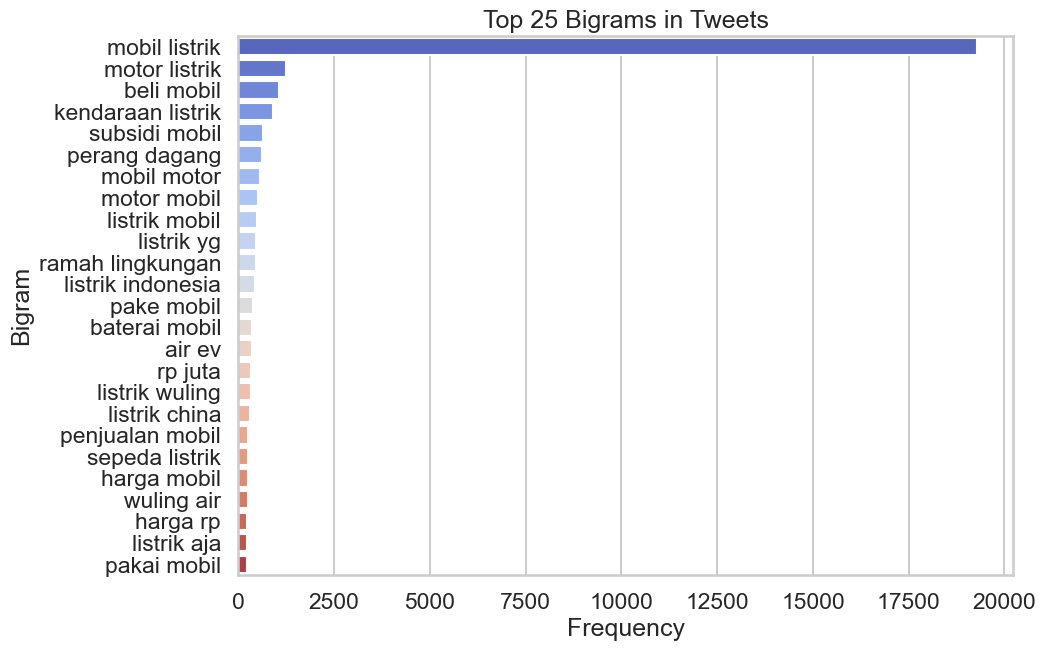

In [33]:
## Confirm Bigram Analysis again

# Show top 25 bigrams
print("\nTop 25 Bigrams:")
for bigram, count in bigrams[:25]:
    print(f"{bigram}: {int(count)}")

# Convert to DataFrame and plot
bigrams_df = pd.DataFrame(bigrams, columns=['Bigram', 'Count'])
plt.figure(figsize=(10,7))
sns.barplot(y='Bigram', x='Count', data=bigrams_df.head(25), palette='coolwarm')
plt.title("Top 25 Bigrams in Tweets")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


### Character & Word Distribution Check

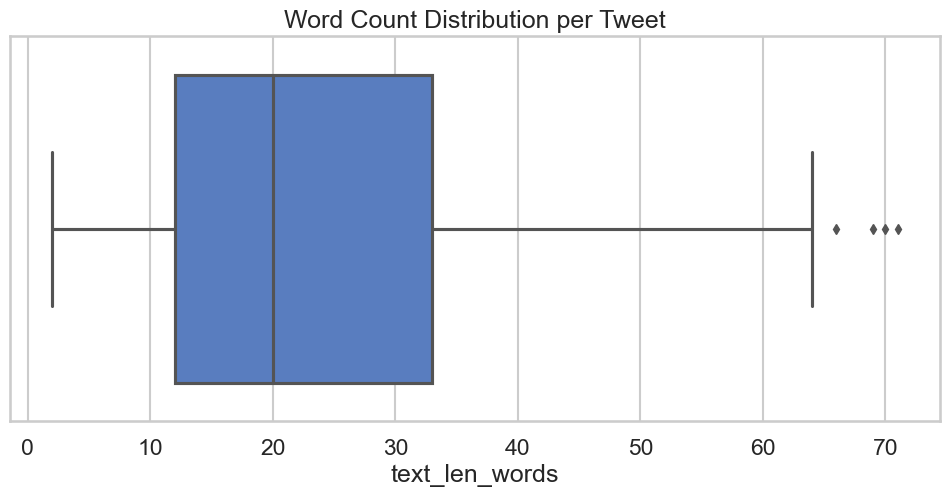

In [34]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['text_len_words'])
plt.title("Word Count Distribution per Tweet")
plt.show()



Text length (words) summary:


count    23221.000000
mean        22.583222
std         12.341370
min          2.000000
25%         12.000000
50%         20.000000
75%         33.000000
max         71.000000
Name: text_len_words, dtype: float64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


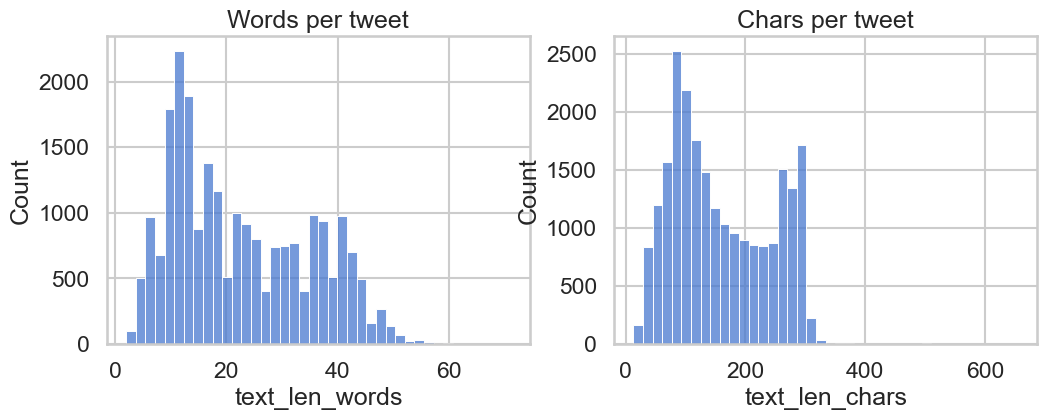


Tweets with URL: 10520 / 23221
Tweets with mention: 8967 / 23221
Tweets with hashtag: 2794 / 23221
Tweets with emoji: 148 / 23221


In [36]:

# -------------------------
# 3. Text-level diagnostics
# -------------------------
def extract_urls(text):
    return re.findall(r'http\S+|www\.\S+', str(text))

def count_hashtags(text):
    return len(re.findall(r'#\w+', str(text)))

def count_mentions(text):
    return len(re.findall(r'@\w+', str(text)))

def extract_emojis(text):
    return [c for c in str(text) if c in emoji.EMOJI_DATA]

def clean_for_tokenization(text):
    t = str(text).lower()
    t = re.sub(r'http\S+|www\.\S+', ' ', t)
    t = re.sub(r'@\w+', ' ', t)
    t = re.sub(r'#\w+', ' ', t)
    t = re.sub(r'[^\w\s]', ' ', t)   # keep alphanum + underscores
    t = re.sub(r'\d+', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

# engineer columns
df['text_len_chars'] = df['full_text'].astype(str).apply(len)
df['text_len_words'] = df['full_text'].astype(str).apply(lambda x: len(str(x).split()))
df['n_urls'] = df['full_text'].apply(lambda x: len(extract_urls(x)))
df['n_hashtags'] = df['full_text'].apply(count_hashtags)
df['n_mentions'] = df['full_text'].apply(count_mentions)
df['n_emojis'] = df['full_text'].apply(lambda x: len(extract_emojis(x)))
df['clean_for_tokens'] = df['full_text'].apply(clean_for_tokenization)

print("\nText length (words) summary:")
display(df['text_len_words'].describe())

# quick histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['text_len_words'], bins=40)
plt.title("Words per tweet")

plt.subplot(1,2,2)
sns.histplot(df['text_len_chars'], bins=40)
plt.title("Chars per tweet")
plt.show()

# number of tweets with URLs, mentions, hashtags, emojis
print("\nTweets with URL:", (df['n_urls']>0).sum(), "/", len(df))
print("Tweets with mention:", (df['n_mentions']>0).sum(), "/", len(df))
print("Tweets with hashtag:", (df['n_hashtags']>0).sum(), "/", len(df))
print("Tweets with emoji:", (df['n_emojis']>0).sum(), "/", len(df))

### Mentions, Hashtags, URLs — Interaction Features

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


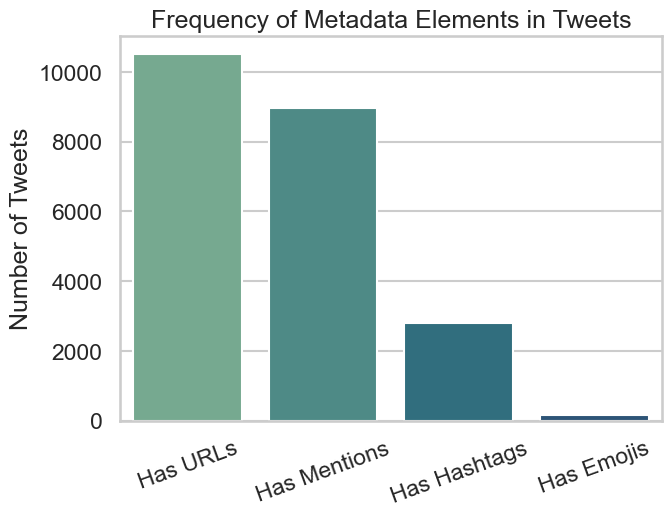

In [37]:
meta_counts = {
    'Has URLs': (df['n_urls']>0).sum(),
    'Has Mentions': (df['n_mentions']>0).sum(),
    'Has Hashtags': (df['n_hashtags']>0).sum(),
    'Has Emojis': (df['n_emojis']>0).sum()
}

plt.figure(figsize=(7,5))
sns.barplot(x=list(meta_counts.keys()), y=list(meta_counts.values()), palette='crest')
plt.title("Frequency of Metadata Elements in Tweets")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=20)
plt.show()


### Frequent Keywords by Context

In [38]:
topics = {
    'Economy': ['harga', 'subsidi', 'beli', 'jual', 'rp'],
    'Technology': ['baterai', 'ev', 'motor', 'mobil', 'self', 'driving'],
    'Policy': ['pemerintah', 'aturan', 'negara', 'jokowi', 'program']
}

for label, words in topics.items():
    count = sum(df['clean_for_tokens'].str.contains('|'.join(words), case=False))
    print(f"{label}: {count} tweets ({count/len(df)*100:.2f}%)")


Economy: 6328 tweets (27.25%)
Technology: 21201 tweets (91.30%)
Policy: 2012 tweets (8.66%)


### Temporal Insights (Optional)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12336\3570835398.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M')


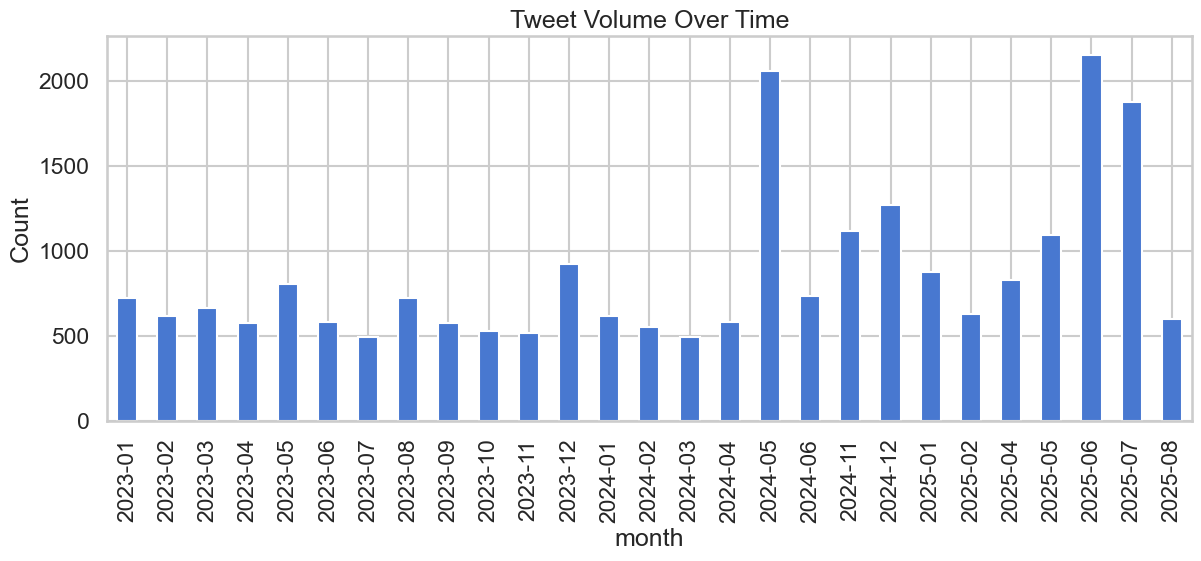

In [39]:
# df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['month'] = df['created_at'].dt.to_period('M')

tweet_by_month = df.groupby('month').size()
tweet_by_month.plot(kind='bar', figsize=(14,5))
plt.title("Tweet Volume Over Time")
plt.ylabel("Count")
plt.show()


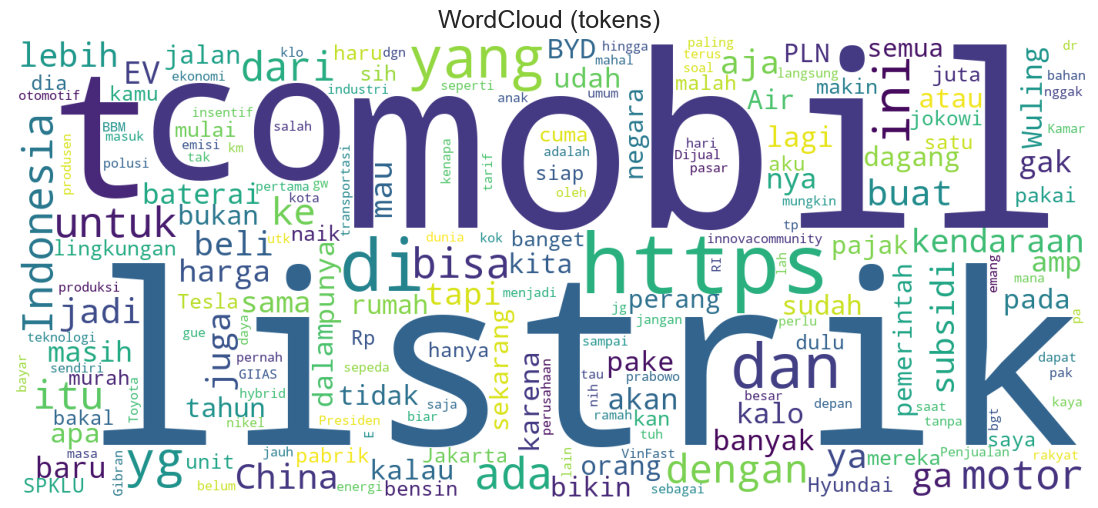

In [40]:
# Wordcloud (visual)
text_for_wc = " ".join(df['full_text'].astype(str).values)
wc = WordCloud(width=1400, height=600, background_color='white', collocations=False).generate(text_for_wc)
plt.figure(figsize=(14,6)); plt.imshow(wc); plt.axis('off'); plt.title("WordCloud (tokens)"); plt.show()


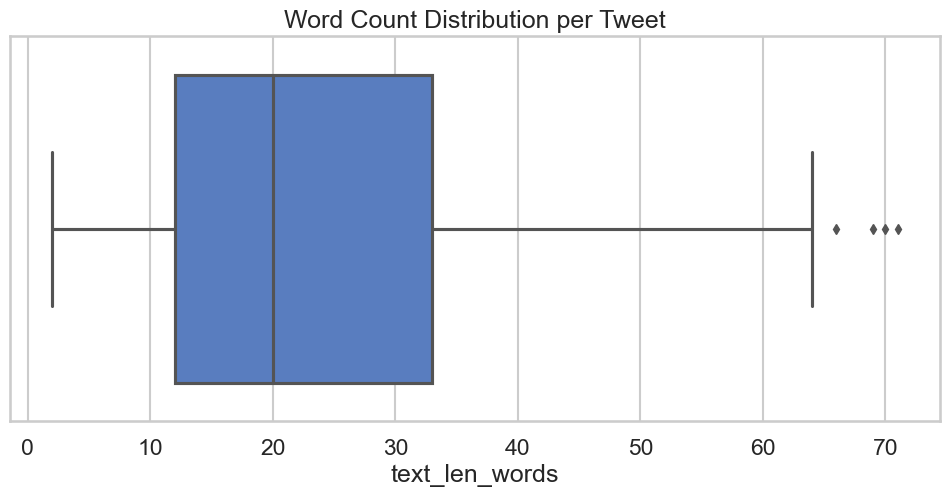

In [41]:
df['text_len_words'] = df['full_text'].astype(str).apply(lambda x: len(str(x).split()))


plt.figure(figsize=(12,5))
sns.boxplot(x=df['text_len_words'])
plt.title("Word Count Distribution per Tweet")
plt.show()

In [46]:
df

created_at  favorite_count  \
0     2023-01-01 00:19:45+00:00               0   
1     2023-01-01 00:32:02+00:00               0   
2     2023-01-01 02:35:01+00:00               0   
3     2023-01-01 03:24:03+00:00               0   
4     2023-01-01 04:36:34+00:00               1   
...                         ...             ...   
23216 2025-08-30 15:20:14+00:00               0   
23217 2025-08-30 15:37:41+00:00               0   
23218 2025-08-30 15:54:13+00:00               0   
23219 2025-08-30 15:59:52+00:00               0   
23220 2025-08-30 18:37:19+00:00               0   

                                               full_text  \
0      @roses_man Biar horangkayah pake mobil listrik...   
1      Bulan Depan Suzuki Luncurkan 3 Produk Baru Sal...   
2      @jokowi Kenangan baik di 2022 akan disambut de...   
3      [Mobil Listrik/Self Driving] Kendaraan listrik...   
4      Mobil Listrik Kloningan Daihatsu Ini Siap Masu...   
...                                                  ...   
23216  @KingArthur21921 @ilhampid Mobil yang dirusak ...   
23217            @TenangTweet pengen punya mobil listrik   
23218  Byd seal ganteng bgt gilaa keknya seal satu-sa...   
23219  Rumah Anggota DPR @a_sahroni di Priok digerudu...   
23220  yang rakyat punya : tubuh benda sekitar yang m...   

                                  id_str lang  quote_count  reply_count  \
0      160934358613454996348478165090304   in            0            0   
1      160934667732398999397968505733120   in            0            0   
2      160937762459341993611364283711488   in            0            0   
3      160938996765412003888405204172800   in            0            1   
4      160999999999999997290450088099840   in            0            0   
...                                  ...  ...          ...          ...   
23216                1961811202532937961   in            0            0   
23217                1961815594749346033   in            0            0   
23218                1961819758388760959   in            0            0   
23219                1961821179326726562   in            0            1   
23220                1961860800970457574   in            0            1   

       retweet_count                                          tweet_url  \
0                  0  https://x.com/Ozy_MoTo/status/1609343586134556674   
1                  0  https://x.com/nasionalisme_co/status/160934667...   
2                  0  https://x.com/vivas_almar/status/1609377624593...   
3                  0  https://x.com/pekerja_paksa/status/16093899676...   
4                  0    https://x.com/otosia/status/1609408213744783361   
...              ...                                                ...   
23216              0  https://x.com/undefined/status/196181120253293...   
23217              0  https://x.com/undefined/status/196181559474934...   
23218              0  https://x.com/undefined/status/196181975838876...   
23219              0  https://x.com/undefined/status/196182117932672...   
23220              0  https://x.com/undefined/status/196186080097045...   

                             user_id_str  ...  text_len_words  n_urls  \
0      126236966622519003598589175791616  ...              15       0   
1                             3178203738  ...              13       2   
2       13488590028351999140924651208704  ...              30       0   
3      121077648168248000906625420361728  ...              15       2   
4                              117686358  ...              37       2   
...                                  ...  ...             ...     ...   
23216                1720665183188922368  ...              36       0   
23217                1907772010815746048  ...               5       0   
23218                          854407159  ...              19       0   
23219                 839770049309106176  ...              27       1   
23220                1013448477437657088  ...              40       0   

       n

In [48]:
print("Rows:", df.shape[0])
print("Average words:", df['text_len_words'].mean())
print("Max words:", df['text_len_words'].max())
print("Min words:", df['text_len_words'].min())

print("\nFive longest tweets:")
display(df.nlargest(5, 'text_len_words')[['full_text', 'text_len_words']])

print("\nFive shortest tweets:")
display(df.nsmallest(5, 'text_len_words')[['full_text', 'text_len_words']])


Rows: 23221
Average words: 22.58322208345894
Max words: 71
Min words: 2

Five longest tweets:


full_text  text_len_words
18835  @susi2001122 @quitjournIs @EviDrajat @OMB4K13 ...              71
18802  @quitjournIs @EviDrajat @OMB4K13 @Hermoyliana ...              70
18796  @susi2001122 @quitjournIs @EviDrajat @OMB4K13 ...              69
18799  @quitjournIs @EviDrajat @OMB4K13 @Hermoyliana ...              66
10406  FOR SALE: BRAND NEW CIPETE. 2 Unit Rumah Bangu...              64


Five shortest tweets:


full_text  text_len_words
2660    Mobil listrik.               2
4762     Mobil Listrik               2
6746     mobil listrik               2
6988     Mobil listrik               2
8956  Mobil listrik???               2

In [50]:
# Check how many ultra-short texts we have (1–3 words)
short_texts = df[df['text_len_words'] <= 3]
print("Count of very short texts:", len(short_texts))
print("\nSample short entries:\n", short_texts['full_text'].head(10).tolist())


Count of very short texts: 100

Sample short entries:
 ['Mobil Listrik https://t.co/DtCC72I103', 'naksir mobil listrik', '@AirinDatangLagi Mobil listrik', 'Hidup mobil listrik!', 'Mobil listrik https://t.co/KgCvh0yViB', '@VICE_ID Mobil Listrik', 'Jadi mobil listrik ', 'MOBIL LISTRIK SOLUSINYAAAAAA', '@ridwanhr mobil listrik?', 'Mobil listrik solusinya']


In [51]:
df.describe()

favorite_count   quote_count   reply_count  retweet_count  \
count    23221.000000  23221.000000  23221.000000   23221.000000   
mean        25.005039      0.796348      2.817536       6.275526   
std        379.217931     14.313627     29.011775     105.561957   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.000000      0.000000      0.000000       0.000000   
50%          0.000000      0.000000      0.000000       0.000000   
75%          1.000000      0.000000      1.000000       0.000000   
max      22987.000000   1389.000000   1408.000000    8191.000000   

       text_len_chars  text_len_words        n_urls    n_hashtags  \
count    23221.000000    23221.000000  23221.000000  23221.000000   
mean       159.739675       22.583222      0.513328      0.302571   
std         82.206865       12.341370      0.616005      1.073567   
min         13.000000        2.000000      0.000000      0.000000   
25%         91.000000       12.000000      0.000000      0.000000   
50%        140.000000       20.000000      0.000000      0.000000   
75%        236.000000       33.000000      1.000000      0.000000   
max        655.000000       71.000000      6.000000     23.000000   

         n_mentions      n_emojis  engagement_sum  
count  23221.000000  23221.000000    23221.000000  
mean       0.612850      0.008053       34.894449  
std        1.545346      0.123035      498.277519  
min        0.000000      0.000000        0.000000  
25%        0.000000      0.000000        0.000000  
50%        0.000000      0.000000        1.000000  
75%        1.000000      0.000000        2.000000  
max       37.000000      8.000000    31962.000000

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


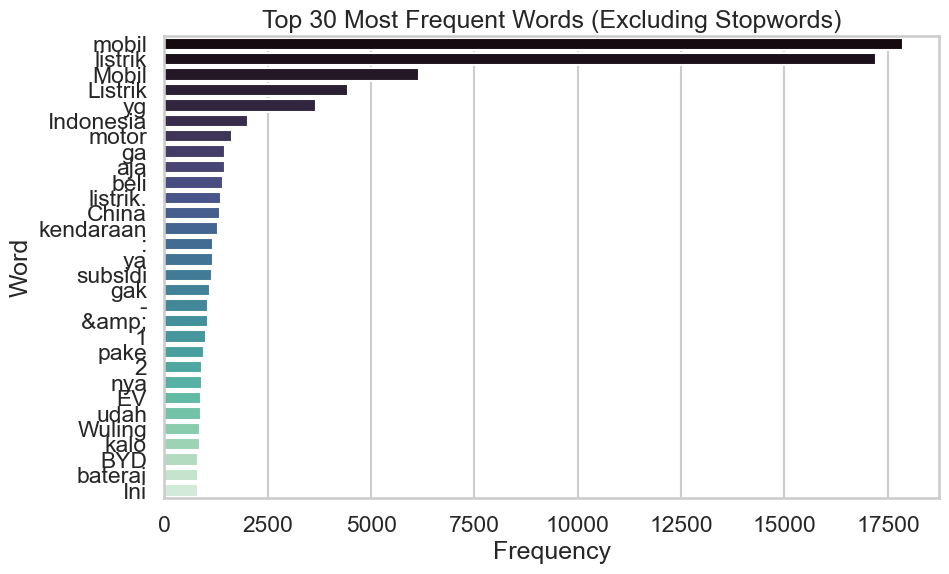

In [52]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

all_words = ' '.join(df['full_text']).split()
filtered_words = [w for w in all_words if w not in stop_words]
word_freq = Counter(filtered_words)

most_common = word_freq.most_common(30)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(y=[w[0] for w in most_common], x=[w[1] for w in most_common], palette='mako')
plt.title("Top 30 Most Frequent Words (Excluding Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


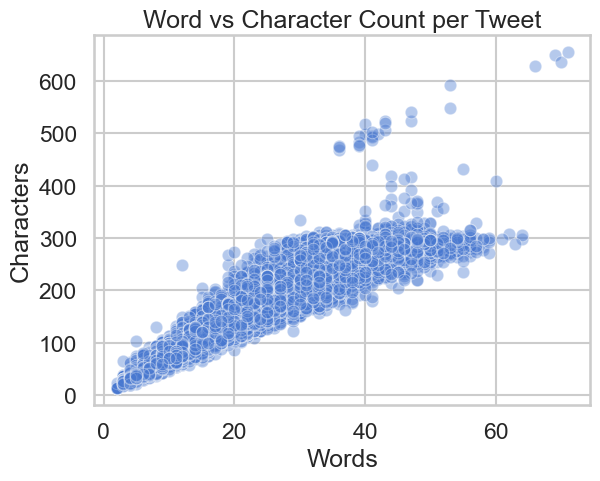

In [53]:
sns.scatterplot(x='text_len_words', y='text_len_chars', data=df, alpha=0.4)
plt.title("Word vs Character Count per Tweet")
plt.xlabel("Words")
plt.ylabel("Characters")
plt.show()


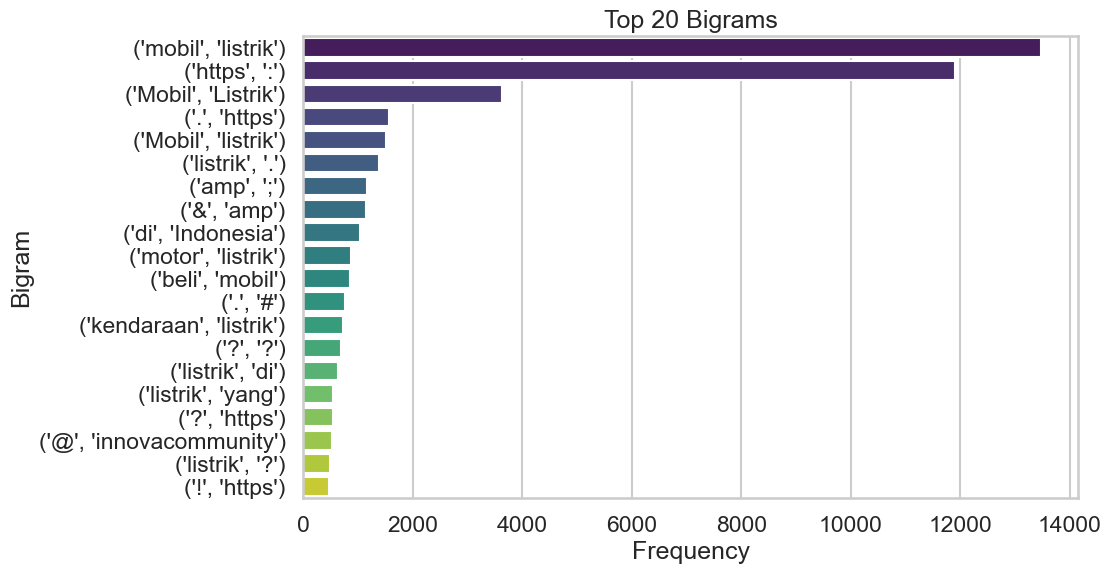

In [54]:
from nltk import bigrams
from nltk.tokenize import word_tokenize
from collections import Counter

all_bigrams = []
for text in df['full_text']:
    tokens = word_tokenize(text)
    all_bigrams.extend(list(bigrams(tokens)))

bigram_freq = Counter(all_bigrams)
most_common_bigrams = bigram_freq.most_common(20)

bigrams_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Count'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].astype(str)

plt.figure(figsize=(10,6))
sns.barplot(y='Bigram', x='Count', data=bigrams_df, palette='viridis')
plt.title("Top 20 Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


# ===============================================================
# Clean The Text `(final_text)` col into `clean_text`
# ===============================================================

In [56]:
import re

def clean_text(text):
    text = text.lower()                                   # lowercase everything
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # remove URLs
    text = re.sub(r'@\w+', '', text)                      # remove mentions
    text = re.sub(r'#\w+', '', text)                      # remove hashtags
    text = re.sub(r'[^A-Za-zÀ-ÿ\s]', '', text)            # remove numbers, punctuations
    text = re.sub(r'\s+', ' ', text).strip()              # normalize spaces
    return text

df['clean_text'] = df['full_text'].astype(str).apply(clean_text)


In [57]:
df

created_at  favorite_count  \
0     2023-01-01 00:19:45+00:00               0   
1     2023-01-01 00:32:02+00:00               0   
2     2023-01-01 02:35:01+00:00               0   
3     2023-01-01 03:24:03+00:00               0   
4     2023-01-01 04:36:34+00:00               1   
...                         ...             ...   
23216 2025-08-30 15:20:14+00:00               0   
23217 2025-08-30 15:37:41+00:00               0   
23218 2025-08-30 15:54:13+00:00               0   
23219 2025-08-30 15:59:52+00:00               0   
23220 2025-08-30 18:37:19+00:00               0   

                                               full_text  \
0      @roses_man Biar horangkayah pake mobil listrik...   
1      Bulan Depan Suzuki Luncurkan 3 Produk Baru Sal...   
2      @jokowi Kenangan baik di 2022 akan disambut de...   
3      [Mobil Listrik/Self Driving] Kendaraan listrik...   
4      Mobil Listrik Kloningan Daihatsu Ini Siap Masu...   
...                                                  ...   
23216  @KingArthur21921 @ilhampid Mobil yang dirusak ...   
23217            @TenangTweet pengen punya mobil listrik   
23218  Byd seal ganteng bgt gilaa keknya seal satu-sa...   
23219  Rumah Anggota DPR @a_sahroni di Priok digerudu...   
23220  yang rakyat punya : tubuh benda sekitar yang m...   

                                  id_str lang  quote_count  reply_count  \
0      160934358613454996348478165090304   in            0            0   
1      160934667732398999397968505733120   in            0            0   
2      160937762459341993611364283711488   in            0            0   
3      160938996765412003888405204172800   in            0            1   
4      160999999999999997290450088099840   in            0            0   
...                                  ...  ...          ...          ...   
23216                1961811202532937961   in            0            0   
23217                1961815594749346033   in            0            0   
23218                1961819758388760959   in            0            0   
23219                1961821179326726562   in            0            1   
23220                1961860800970457574   in            0            1   

       retweet_count                                          tweet_url  \
0                  0  https://x.com/Ozy_MoTo/status/1609343586134556674   
1                  0  https://x.com/nasionalisme_co/status/160934667...   
2                  0  https://x.com/vivas_almar/status/1609377624593...   
3                  0  https://x.com/pekerja_paksa/status/16093899676...   
4                  0    https://x.com/otosia/status/1609408213744783361   
...              ...                                                ...   
23216              0  https://x.com/undefined/status/196181120253293...   
23217              0  https://x.com/undefined/status/196181559474934...   
23218              0  https://x.com/undefined/status/196181975838876...   
23219              0  https://x.com/undefined/status/196182117932672...   
23220              0  https://x.com/undefined/status/196186080097045...   

                             user_id_str  ...  n_urls  n_hashtags  n_mentions  \
0      126236966622519003598589175791616  ...       0           0           1   
1                             3178203738  ...       2           0           0   
2       13488590028351999140924651208704  ...       0           0           1   
3      121077648168248000906625420361728  ...       2           0           0   
4                              117686358  ...       2           0           0   
...                                  ...  ...     ...         ...         ...   
23216                1720665183188922368  ...       0           0           2   
23217                1907772010815746048  ...       0           0           1   
23218                          854407159  ...       0           0           0   
23219                 839770049309106176  ...       1           4          

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23221 entries, 0 to 23220
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   created_at        23221 non-null  datetime64[ns, UTC]
 1   favorite_count    23221 non-null  int64              
 2   full_text         23221 non-null  object             
 3   id_str            23221 non-null  object             
 4   lang              23221 non-null  object             
 5   quote_count       23221 non-null  int64              
 6   reply_count       23221 non-null  int64              
 7   retweet_count     23221 non-null  int64              
 8   tweet_url         23221 non-null  object             
 9   user_id_str       23221 non-null  object             
 10  text_len_chars    23221 non-null  int64              
 11  text_len_words    23221 non-null  int64              
 12  n_urls            23221 non-null  int64              
 13  n

In [59]:
df.describe(include='all')


created_at  favorite_count  \
count                                 23221    23221.000000   
unique                                  NaN             NaN   
top                                     NaN             NaN   
freq                                    NaN             NaN   
mean    2024-06-21 16:38:45.031566080+00:00       25.005039   
min               2023-01-01 00:19:45+00:00        0.000000   
25%               2023-10-03 05:41:04+00:00        0.000000   
50%               2024-05-23 12:11:17+00:00        0.000000   
75%               2025-04-29 06:06:00+00:00        1.000000   
max               2025-08-30 18:37:19+00:00    22987.000000   
std                                     NaN      379.217931   

                                                full_text  \
count                                               23221   
unique                                              23094   
top     Luhut Binsar Pandjaitan Sebut ada Merek Mobil ...   
freq                                                   14   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                                   id_str   lang   quote_count   reply_count  \
count                               23221  23221  23221.000000  23221.000000   
unique                              23221      1           NaN           NaN   
top     160934358613454996348478165090304     in           NaN           NaN   
freq                                    1  23221           NaN           NaN   
mean                                  NaN    NaN      0.796348      2.817536   
min                                   NaN    NaN      0.000000      0.000000   
25%                                   NaN    NaN      0.000000      0.000000   
50%                                   NaN    NaN      0.000000      0.000000   
75%                                   NaN    NaN      0.000000      1.000000   
max                                   NaN    NaN   1389.000000   1408.000000   
std                                   NaN    NaN     14.313627     29.011775   

        retweet_count                                          tweet_url  \
count    23221.000000                                              23221   
unique            NaN                                              23218   
top               NaN  https://x.com/andrias98/status/167551940024037...   
freq              NaN                                                  2   
mean         6.275526                                                NaN   
min          0.000000                                                NaN   
25%          0.000000                                                NaN   
50%          0.000000                                                NaN   
75%          0.000000                                                NaN   
max       8191.000000                                                NaN   
std        105.561957                                                NaN   

       user_id_str  ...        n_urls    n_hashtags    n_mentions  \
count        23221  ...  23221.000000  23221.000000  23221.000000   
unique       12748  ...           NaN           NaN           NaN   
top       80543284  ...           NaN           NaN           NaN   
freq           685  ...           NaN           NaN           NaN   
mean           NaN  ...      0.513328      0.302571      0.612850   
min            NaN  ...      0.000000      0.000000      0.000000   
25%            NaN  ...      0.000000      0.000000      0.000000   
50%            NaN  ...      0.000000      0.000000      0.000000   
75%            NaN  ...      1.000000      0.000

In [60]:
df.isnull().sum()


created_at          0
favorite_count      0
full_text           0
id_str              0
lang                0
quote_count         0
reply_count         0
retweet_count       0
tweet_url           0
user_id_str         0
text_len_chars      0
text_len_words      0
n_urls              0
n_hashtags          0
n_mentions          0
n_emojis            0
clean_for_tokens    0
engagement_sum      0
date                0
simple_lex          0
month               0
clean_text          0
dtype: int64

In [61]:
df.duplicated().sum()


0

In [62]:
# Text-Based Statistics
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['clean_text'].apply(len)
df[['word_count', 'char_count']].describe()


word_count    char_count
count  23221.000000  23221.000000
mean      20.397959    130.647733
std       11.635117     74.777997
min        1.000000      5.000000
25%       10.000000     66.000000
50%       17.000000    112.000000
75%       30.000000    197.000000
max       55.000000    280.000000

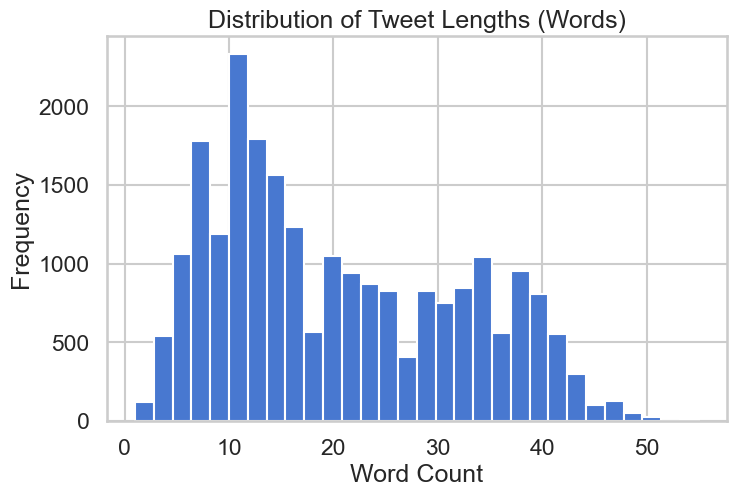

In [63]:
# plot

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['word_count'], bins=30)
plt.title('Distribution of Tweet Lengths (Words)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [66]:
# Most Common Words (Global)
from collections import Counter
import itertools

all_words = list(itertools.chain.from_iterable(df['clean_text'].apply(str.split)))
Counter(all_words).most_common(20)


[('mobil', 24642),
 ('listrik', 24486),
 ('di', 8779),
 ('dan', 6083),
 ('yang', 5210),
 ('ini', 3984),
 ('yg', 3893),
 ('ada', 3066),
 ('bisa', 2753),
 ('untuk', 2711),
 ('indonesia', 2709),
 ('dari', 2580),
 ('dengan', 2444),
 ('itu', 2399),
 ('ke', 2244),
 ('motor', 2128),
 ('buat', 1941),
 ('jadi', 1840),
 ('ya', 1812),
 ('china', 1783)]

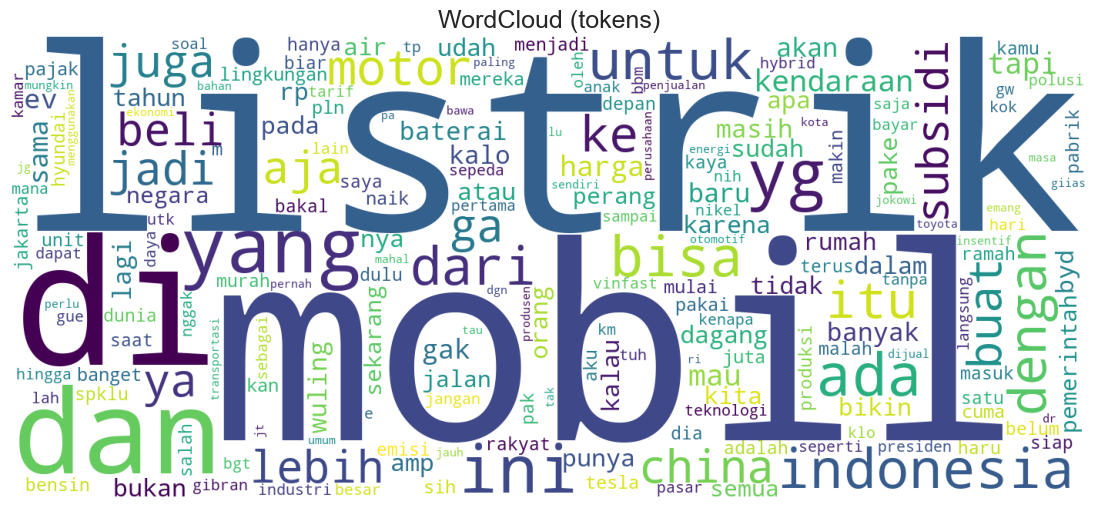

In [80]:
# Wordcloud (visual)
text_for_wc = " ".join(df['clean_text'].astype(str).values)
wc = WordCloud(width=1400, height=600, background_color='white', collocations=False).generate(text_for_wc)
plt.figure(figsize=(14,6)); plt.imshow(wc); plt.axis('off'); plt.title("WordCloud (tokens)"); plt.show()


In [71]:
# Bigram Analysis

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), max_features=20)
bigrams = vectorizer.fit_transform(df['clean_text'])
bigrams_sum = bigrams.sum(axis=0)
bigrams_freq = [(word, bigrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)
bigrams_freq[:10]


[('mobil listrik', 18977),
 ('di indonesia', 1112),
 ('motor listrik', 1085),
 ('beli mobil', 1022),
 ('listrik di', 935),
 ('kendaraan listrik', 902),
 ('listrik yang', 652),
 ('perang dagang', 596),
 ('subsidi mobil', 586),
 ('listrik dan', 544)]

In [87]:
# Trigram Analysis

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(3,3), max_features=20)
Trigrams = vectorizer.fit_transform(df['clean_text'])
Trigrams_sum = Trigrams.sum(axis=0)
Trigrams_freq = [(word, bigrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
Trigrams_freq = sorted(bigrams_freq, key=lambda x: x[1], reverse=True)
Trigrams_freq[:10]


[('beli mobil listrik', 849),
 ('mobil listrik di', 744),
 ('subsidi mobil listrik', 539),
 ('mobil listrik yang', 539),
 ('mobil listrik dan', 372),
 ('baterai mobil listrik', 322),
 ('mobil listrik yg', 308),
 ('pake mobil listrik', 306),
 ('listrik di indonesia', 288),
 ('mobil listrik wuling', 263)]

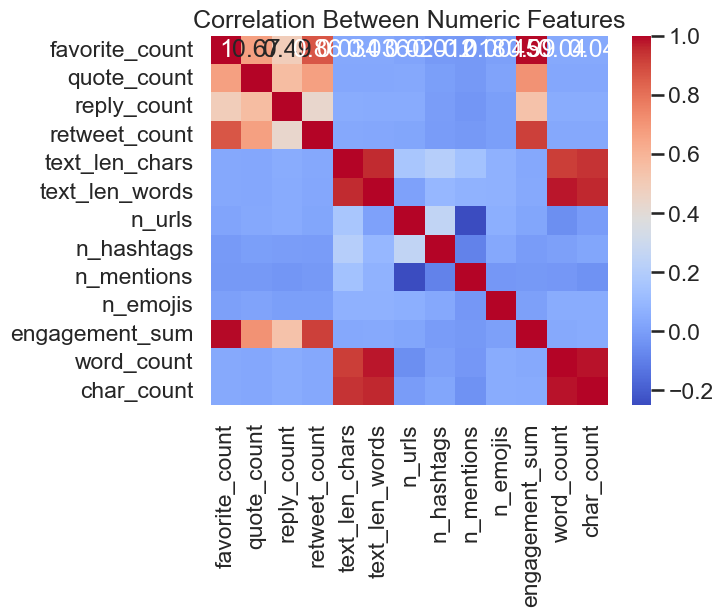

In [73]:
# Correlation Heatmap (Numeric Columns)
import seaborn as sns
import numpy as np

df_corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()


In [75]:
# Emoji / Special Symbol Check (optional)

import emoji
df['emoji_count'] = df['clean_text'].apply(lambda x: sum(1 for c in x if c in emoji.EMOJI_DATA))
print(df['emoji_count'].describe())


count    23221.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: emoji_count, dtype: float64



Text length (words) summary:


count    23221.000000
mean        20.397959
std         11.635117
min          1.000000
25%         10.000000
50%         17.000000
75%         30.000000
max         55.000000
Name: text_len_words, dtype: float64

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


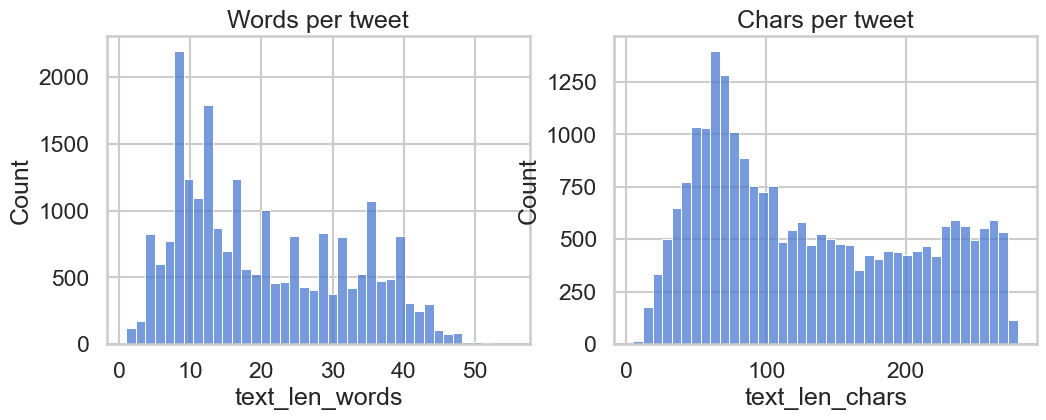


Tweets with URL: 0 / 23221
Tweets with mention: 0 / 23221
Tweets with hashtag: 0 / 23221
Tweets with emoji: 0 / 23221


In [76]:

# -------------------------
#  Text-level diagnostics
# -------------------------
def extract_urls(text):
    return re.findall(r'http\S+|www\.\S+', str(text))

def count_hashtags(text):
    return len(re.findall(r'#\w+', str(text)))

def count_mentions(text):
    return len(re.findall(r'@\w+', str(text)))

def extract_emojis(text):
    return [c for c in str(text) if c in emoji.EMOJI_DATA]

def clean_for_tokenization(text):
    t = str(text).lower()
    t = re.sub(r'http\S+|www\.\S+', ' ', t)
    t = re.sub(r'@\w+', ' ', t)
    t = re.sub(r'#\w+', ' ', t)
    t = re.sub(r'[^\w\s]', ' ', t)   # keep alphanum + underscores
    t = re.sub(r'\d+', ' ', t)
    t = re.sub(r'\s+', ' ', t).strip()
    return t

# engineer columns
df['text_len_chars'] = df['clean_text'].astype(str).apply(len)
df['text_len_words'] = df['clean_text'].astype(str).apply(lambda x: len(str(x).split()))
df['n_urls'] = df['clean_text'].apply(lambda x: len(extract_urls(x)))
df['n_hashtags'] = df['clean_text'].apply(count_hashtags)
df['n_mentions'] = df['clean_text'].apply(count_mentions)
df['n_emojis'] = df['clean_text'].apply(lambda x: len(extract_emojis(x)))
df['clean_for_tokens'] = df['clean_text'].apply(clean_for_tokenization)

print("\nText length (words) summary:")
display(df['text_len_words'].describe())

# quick histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['text_len_words'], bins=40)
plt.title("Words per tweet")

plt.subplot(1,2,2)
sns.histplot(df['text_len_chars'], bins=40)
plt.title("Chars per tweet")
plt.show()

# number of tweets with URLs, mentions, hashtags, emojis
print("\nTweets with URL:", (df['n_urls']>0).sum(), "/", len(df))
print("Tweets with mention:", (df['n_mentions']>0).sum(), "/", len(df))
print("Tweets with hashtag:", (df['n_hashtags']>0).sum(), "/", len(df))
print("Tweets with emoji:", (df['n_emojis']>0).sum(), "/", len(df))

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


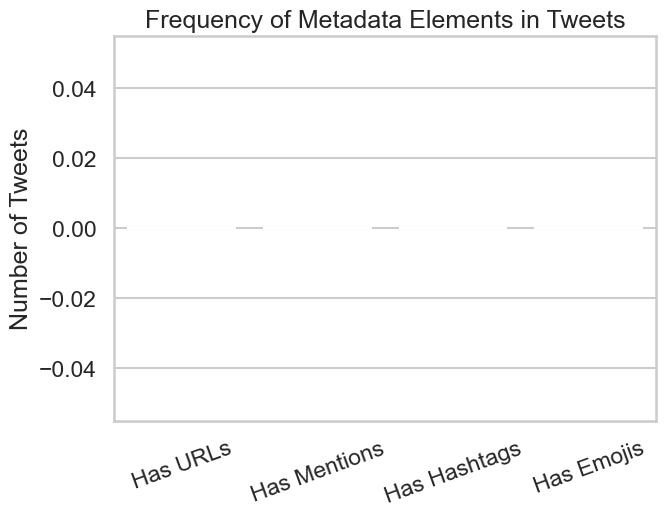

In [77]:
meta_counts = {
    'Has URLs': (df['n_urls']>0).sum(),
    'Has Mentions': (df['n_mentions']>0).sum(),
    'Has Hashtags': (df['n_hashtags']>0).sum(),
    'Has Emojis': (df['n_emojis']>0).sum()
}

plt.figure(figsize=(7,5))
sns.barplot(x=list(meta_counts.keys()), y=list(meta_counts.values()), palette='crest')
plt.title("Frequency of Metadata Elements in Tweets")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=20)
plt.show()


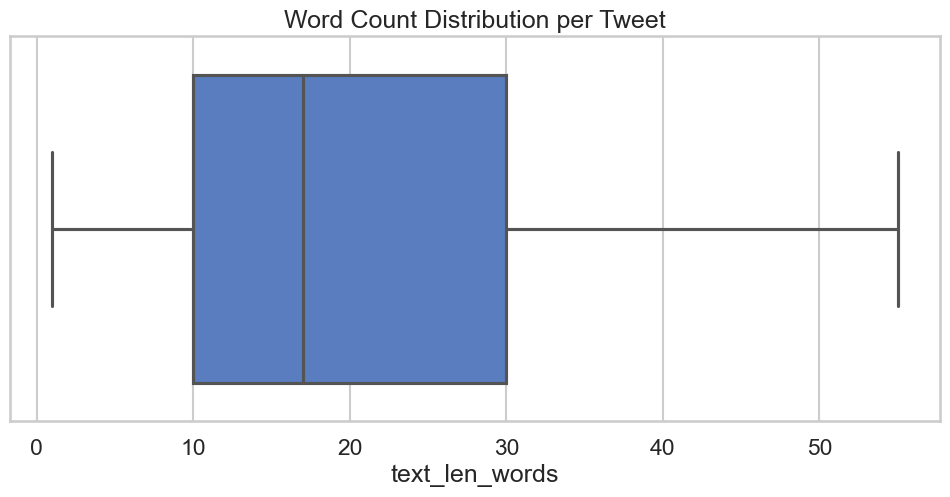

In [78]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['text_len_words'])
plt.title("Word Count Distribution per Tweet")
plt.show()


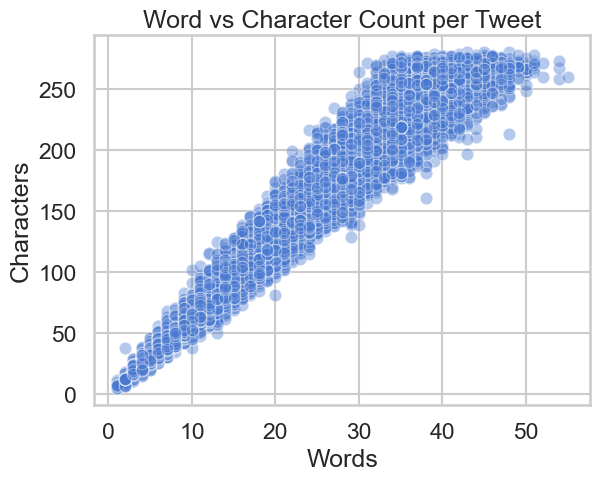

In [81]:
sns.scatterplot(x='text_len_words', y='text_len_chars', data=df, alpha=0.4)
plt.title("Word vs Character Count per Tweet")
plt.xlabel("Words")
plt.ylabel("Characters")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


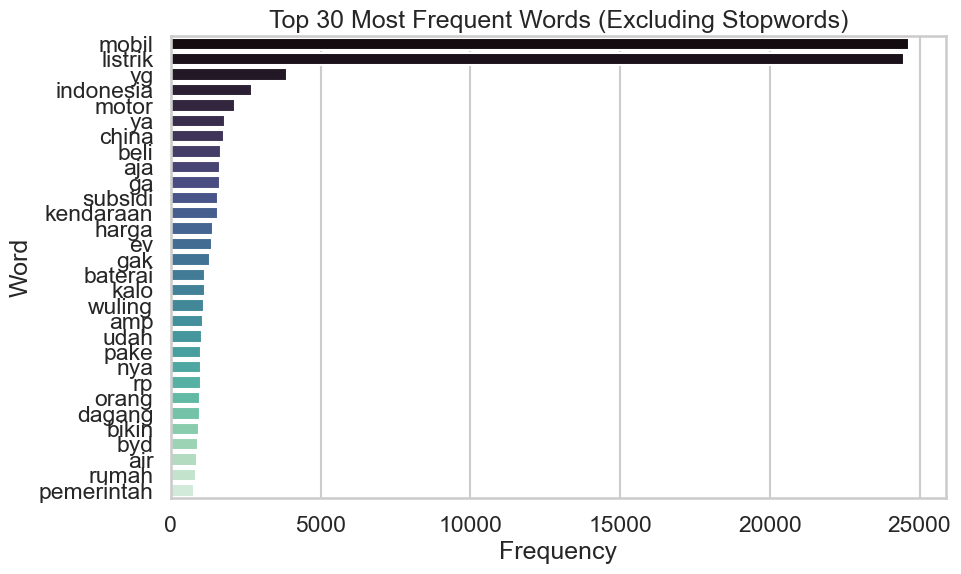

In [82]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

all_words = ' '.join(df['clean_text']).split()
filtered_words = [w for w in all_words if w not in stop_words]
word_freq = Counter(filtered_words)

most_common = word_freq.most_common(30)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(y=[w[0] for w in most_common], x=[w[1] for w in most_common], palette='mako')
plt.title("Top 30 Most Frequent Words (Excluding Stopwords)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


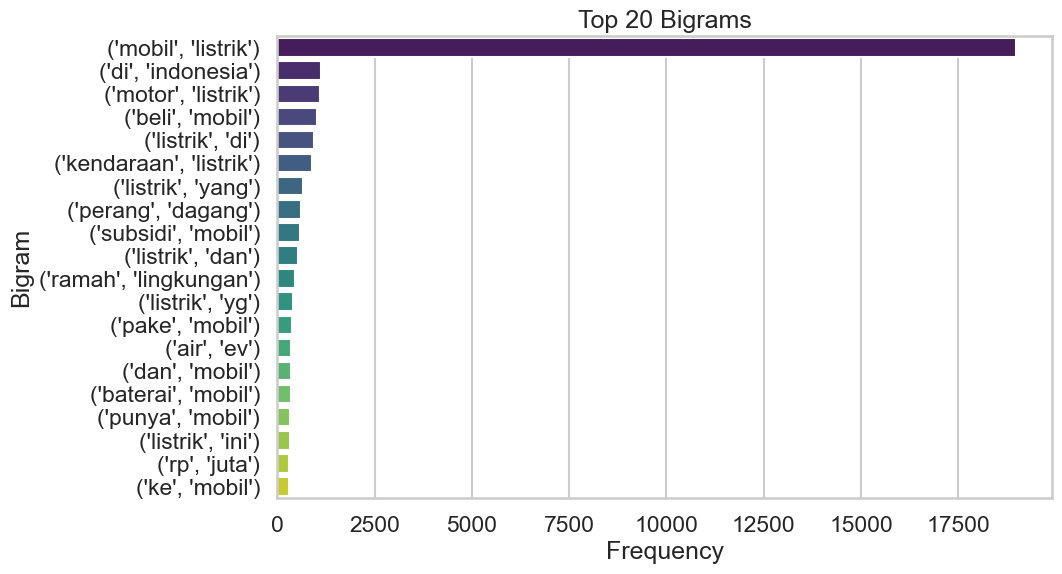

In [89]:
from nltk import bigrams
from nltk.tokenize import word_tokenize
from collections import Counter

all_bigrams = []
for text in df['clean_text']:
    tokens = word_tokenize(text)
    all_bigrams.extend(list(bigrams(tokens)))

bigram_freq = Counter(all_bigrams)
most_common_bigrams = bigram_freq.most_common(20)

bigrams_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Count'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].astype(str)

plt.figure(figsize=(10,6))
sns.barplot(y='Bigram', x='Count', data=bigrams_df, palette='viridis')
plt.title("Top 20 Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


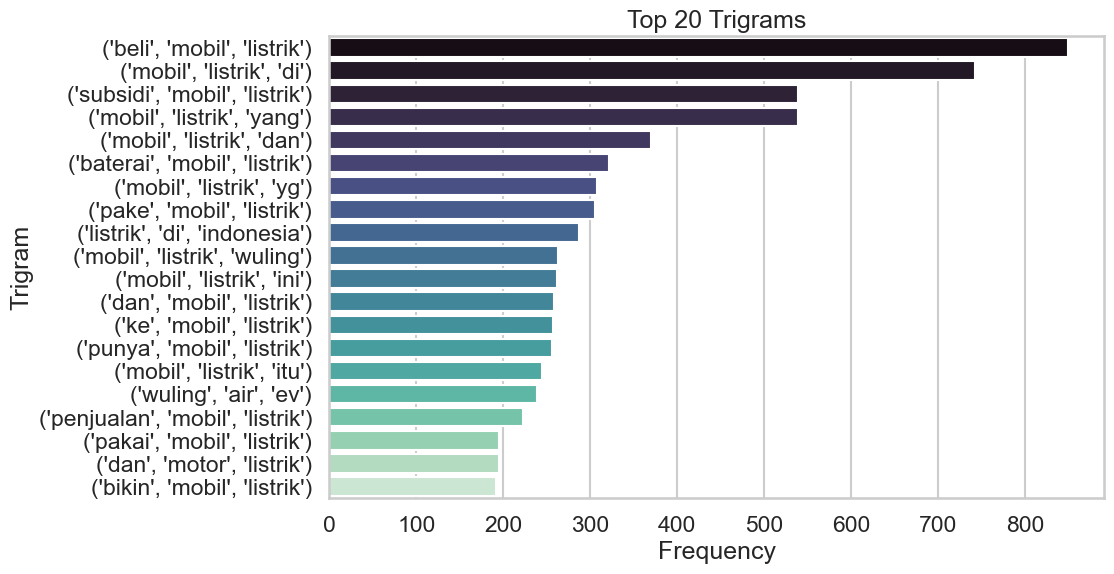

In [90]:
from nltk import trigrams
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate all trigrams
all_trigrams = []
for text in df['clean_text']:
    tokens = word_tokenize(text)
    all_trigrams.extend(list(trigrams(tokens)))

# Count frequency
trigram_freq = Counter(all_trigrams)
most_common_trigrams = trigram_freq.most_common(20)

# Create DataFrame
trigrams_df = pd.DataFrame(most_common_trigrams, columns=['Trigram', 'Count'])
trigrams_df['Trigram'] = trigrams_df['Trigram'].astype(str)

# Plot Top 20 Trigrams
plt.figure(figsize=(10,6))
sns.barplot(y='Trigram', x='Count', data=trigrams_df, palette='mako')
plt.title("Top 20 Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.show()


In [91]:
df.columns

Index(['created_at', 'favorite_count', 'full_text', 'id_str', 'lang',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'text_len_chars', 'text_len_words', 'n_urls',
       'n_hashtags', 'n_mentions', 'n_emojis', 'clean_for_tokens',
       'engagement_sum', 'date', 'simple_lex', 'month', 'clean_text',
       'word_count', 'char_count', 'emoji_count'],
      dtype='object')

### save your `1st version of dataframe` to csv

In [92]:
# Save your updated dataframe to CSV
df.to_csv(r"bersih_cleaned_text.csv", index=False, encoding='utf-8')
df

created_at  favorite_count  \
0     2023-01-01 00:19:45+00:00               0   
1     2023-01-01 00:32:02+00:00               0   
2     2023-01-01 02:35:01+00:00               0   
3     2023-01-01 03:24:03+00:00               0   
4     2023-01-01 04:36:34+00:00               1   
...                         ...             ...   
23216 2025-08-30 15:20:14+00:00               0   
23217 2025-08-30 15:37:41+00:00               0   
23218 2025-08-30 15:54:13+00:00               0   
23219 2025-08-30 15:59:52+00:00               0   
23220 2025-08-30 18:37:19+00:00               0   

                                               full_text  \
0      @roses_man Biar horangkayah pake mobil listrik...   
1      Bulan Depan Suzuki Luncurkan 3 Produk Baru Sal...   
2      @jokowi Kenangan baik di 2022 akan disambut de...   
3      [Mobil Listrik/Self Driving] Kendaraan listrik...   
4      Mobil Listrik Kloningan Daihatsu Ini Siap Masu...   
...                                                  ...   
23216  @KingArthur21921 @ilhampid Mobil yang dirusak ...   
23217            @TenangTweet pengen punya mobil listrik   
23218  Byd seal ganteng bgt gilaa keknya seal satu-sa...   
23219  Rumah Anggota DPR @a_sahroni di Priok digerudu...   
23220  yang rakyat punya : tubuh benda sekitar yang m...   

                                  id_str lang  quote_count  reply_count  \
0      160934358613454996348478165090304   in            0            0   
1      160934667732398999397968505733120   in            0            0   
2      160937762459341993611364283711488   in            0            0   
3      160938996765412003888405204172800   in            0            1   
4      160999999999999997290450088099840   in            0            0   
...                                  ...  ...          ...          ...   
23216                1961811202532937961   in            0            0   
23217                1961815594749346033   in            0            0   
23218                1961819758388760959   in            0            0   
23219                1961821179326726562   in            0            1   
23220                1961860800970457574   in            0            1   

       retweet_count                                          tweet_url  \
0                  0  https://x.com/Ozy_MoTo/status/1609343586134556674   
1                  0  https://x.com/nasionalisme_co/status/160934667...   
2                  0  https://x.com/vivas_almar/status/1609377624593...   
3                  0  https://x.com/pekerja_paksa/status/16093899676...   
4                  0    https://x.com/otosia/status/1609408213744783361   
...              ...                                                ...   
23216              0  https://x.com/undefined/status/196181120253293...   
23217              0  https://x.com/undefined/status/196181559474934...   
23218              0  https://x.com/undefined/status/196181975838876...   
23219              0  https://x.com/undefined/status/196182117932672...   
23220              0  https://x.com/undefined/status/196186080097045...   

                             user_id_str  ...  n_emojis  \
0      126236966622519003598589175791616  ...         0   
1                             3178203738  ...         0   
2       13488590028351999140924651208704  ...         0   
3      121077648168248000906625420361728  ...         0   
4                              117686358  ...         0   
...                                  ...  ...       ...   
23216                1720665183188922368  ...         0   
23217                1907772010815746048  ...         0   
23218                          854407159  ...         0   
23219                 839770049309106176  ...         0   
23220                1013448477437657088  ...         0   

                                        clean_for_tokens  engagement_sum  \
0      biar horangkayah pake mobil listrik subsidi ho...               0   
1      bulan depan suzuk

---

# ===============================================================
# ===============================================================

# ===============================================================
# 2nd Step;   `Data Preprocessing again`
# ===============================================================
* Load the newly created 1st version dataframe `bersih_cleaned_text` 
* Small EDA 
* Remove duplicate rows/text from `clean_text` col
* `Sentiment Labeling` with InSet Lexicon (Indonesian)
* Balanced the target col `Class Balanced`

In [93]:
# load the newly created dataframe
df = pd.read_csv(r"bersih_cleaned_text.csv")

In [94]:
df.duplicated().sum()

0

In [95]:
df['id_str'].duplicated().sum()

0

In [96]:
df['full_text'].duplicated().sum()

127

In [97]:
df['clean_text'].duplicated().sum()

927

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23221 entries, 0 to 23220
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        23221 non-null  object
 1   favorite_count    23221 non-null  int64 
 2   full_text         23221 non-null  object
 3   id_str            23221 non-null  object
 4   lang              23221 non-null  object
 5   quote_count       23221 non-null  int64 
 6   reply_count       23221 non-null  int64 
 7   retweet_count     23221 non-null  int64 
 8   tweet_url         23221 non-null  object
 9   user_id_str       23221 non-null  object
 10  text_len_chars    23221 non-null  int64 
 11  text_len_words    23221 non-null  int64 
 12  n_urls            23221 non-null  int64 
 13  n_hashtags        23221 non-null  int64 
 14  n_mentions        23221 non-null  int64 
 15  n_emojis          23221 non-null  int64 
 16  clean_for_tokens  23221 non-null  object
 17  engagement_s

In [99]:
df.isnull().sum()

created_at          0
favorite_count      0
full_text           0
id_str              0
lang                0
quote_count         0
reply_count         0
retweet_count       0
tweet_url           0
user_id_str         0
text_len_chars      0
text_len_words      0
n_urls              0
n_hashtags          0
n_mentions          0
n_emojis            0
clean_for_tokens    0
engagement_sum      0
date                0
simple_lex          0
month               0
clean_text          0
word_count          0
char_count          0
emoji_count         0
dtype: int64

In [100]:
df.describe()

favorite_count   quote_count   reply_count  retweet_count  \
count    23221.000000  23221.000000  23221.000000   23221.000000   
mean        25.005039      0.796348      2.817536       6.275526   
std        379.217931     14.313627     29.011775     105.561957   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.000000      0.000000      0.000000       0.000000   
50%          0.000000      0.000000      0.000000       0.000000   
75%          1.000000      0.000000      1.000000       0.000000   
max      22987.000000   1389.000000   1408.000000    8191.000000   

       text_len_chars  text_len_words   n_urls  n_hashtags  n_mentions  \
count    23221.000000    23221.000000  23221.0     23221.0     23221.0   
mean       130.647733       20.397959      0.0         0.0         0.0   
std         74.777997       11.635117      0.0         0.0         0.0   
min          5.000000        1.000000      0.0         0.0         0.0   
25%         66.000000       10.000000      0.0         0.0         0.0   
50%        112.000000       17.000000      0.0         0.0         0.0   
75%        197.000000       30.000000      0.0         0.0         0.0   
max        280.000000       55.000000      0.0         0.0         0.0   

       n_emojis  engagement_sum    word_count    char_count  emoji_count  
count   23221.0    23221.000000  23221.000000  23221.000000      23221.0  
mean        0.0       34.894449     20.397959    130.647733          0.0  
std         0.0      498.277519     11.635117     74.777997          0.0  
min         0.0        0.000000      1.000000      5.000000          0.0  
25%         0.0        0.000000     10.000000     66.000000          0.0  
50%         0.0        1.000000     17.000000    112.000000          0.0  
75%         0.0        2.000000     30.000000    197.000000          0.0  
max         0.0    31962.000000     55.000000    280.000000          0.0

In [101]:
# Remove duplicates based on 'clean_text' only and make sure to keep a copy of duplicate rows;
## `keep first sample of each duplicate`

df = df.drop_duplicates(subset='clean_text', keep='first')

# Reset index after dropping
df = df.reset_index(drop=True)

# Check remaining duplicates (should be 0)
print("Remaining duplicates in 'clean_text':", df['clean_text'].duplicated().sum())

# Confirm new shape
print("Updated dataset shape:", df.shape)


Remaining duplicates in 'clean_text': 0
Updated dataset shape: (22294, 25)


# =============================================================
#  Sentiment Labeling with InSet Lexicon (Indonesian)
# =============================================================

In [102]:
# ======================================
# 🔧 Sentiment Labeling with InSet Lexicon (Indonesian)
# ======================================

import pandas as pd
import re

# # ---------------------------
# # 1. Load Dataset
# # ---------------------------
# df = pd.read_csv(r"C:\Users\lenovo\Desktop\Sentiment Analysis\datasets\dataset_selesai_labeled.csv") # update the path

# # Focus only on text + true sentiment
# df = df[['clean_text', 'sentiment']].copy()

# # Drop missing text rows
# df.dropna(subset=['clean_text'], inplace=True)

# # Remove duplicates
# df.drop_duplicates(subset='clean_text', inplace=True)

# ---------------------------
# 2. Load InSet Lexicon
# ---------------------------
pos_path = r"C:\Users\lenovo\Desktop\Sentiment Analysis\InSet-master\positive.tsv"
neg_path = r"C:\Users\lenovo\Desktop\Sentiment Analysis\InSet-master\negative.tsv"

# Skip header line ("word weight")
pos = pd.read_csv(pos_path, sep='\t', skiprows=1, names=['word', 'score'])
neg = pd.read_csv(neg_path, sep='\t', skiprows=1, names=['word', 'score'])

# Combine and normalize
lexicon = pd.concat([pos, neg], ignore_index=True)
lexicon['score'] = lexicon['score'].astype(float) / 5.0  # optional normalization (-1 to +1)

# Create dictionary for lookup
lexicon_dict = dict(zip(lexicon['word'], lexicon['score']))

# ---------------------------
# 3. Define Scoring Function
# ---------------------------
def inset_score(text):
    """
    Compute the average InSet sentiment score for a given text.
    Handles multi-word expressions (up to 3 words).
    """
    text = str(text).lower()
    words = text.split()
    total_score = 0.0
    matched = 0

    for i in range(len(words)):
        # Try matching 3-word, 2-word, and 1-word phrases (in that order)
        for n in [3, 2, 1]:
            phrase = ' '.join(words[i:i+n])
            if phrase in lexicon_dict:
                total_score += lexicon_dict[phrase]
                matched += 1
                break

    if matched == 0:
        return 0.0
    return total_score / matched


# ---------------------------
# 4. Apply Scoring to DataFrame
# ---------------------------
df.loc[:, 'inset_score'] = df['clean_text'].apply(inset_score)

# ---------------------------
# 5. Convert Scores → Sentiment Labels
# ---------------------------
def label_sentiment(score):
    if score > 0.05:
        return 'positif'
    elif score < -0.07:
        return 'negatif'
    else:
        return 'netral'

df.loc[:, 'inset_sentiment'] = df['inset_score'].apply(label_sentiment)

# ---------------------------
# 6. Check Results
# ---------------------------
print("\n Label InSet_Sentiment Distribution:")
print(df['inset_sentiment'].value_counts())


 Label InSet_Sentiment Distribution:
inset_sentiment
negatif    14543
positif     4707
netral      3044
Name: count, dtype: int64


        Pie chart for sentiment distribution


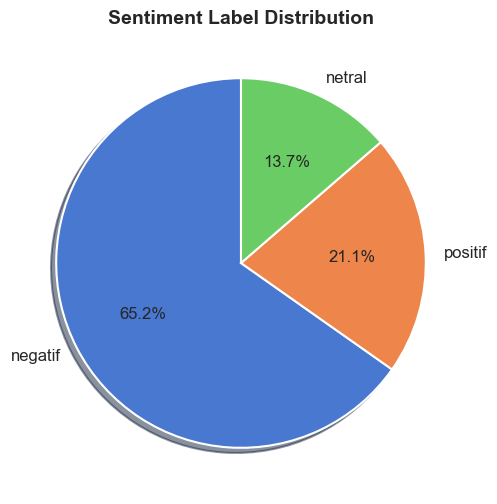

In [103]:
import matplotlib.pyplot as plt

# Pie chart for sentiment distribution
sentiment_counts = df['inset_sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'fontsize': 12}
)
plt.title('Sentiment Label Distribution', fontsize=14, fontweight='bold')
plt.show()


        Make the dataset Balanced

In [104]:
from sklearn.utils import resample

# Separate classes
df_neg = df[df['inset_sentiment'] == 'negatif']
df_pos = df[df['inset_sentiment'] == 'positif']
df_net = df[df['inset_sentiment'] == 'netral']

# Undersample the negative class
df_neg_under = resample(df_neg,
                        replace=False,       # no replacement
                        n_samples=len(df_pos),  # match positive class size
                        random_state=42)

# Combine to form balanced dataset
df_balanced = pd.concat([df_neg_under, df_pos, df_net])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new distribution
print("Balanced Dataset Distribution:")
print(df_balanced['inset_sentiment'].value_counts())


Balanced Dataset Distribution:
inset_sentiment
negatif    4707
positif    4707
netral     3044
Name: count, dtype: int64


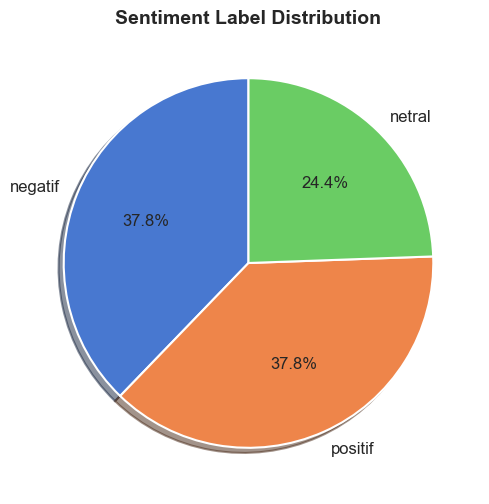

In [105]:
import matplotlib.pyplot as plt

# Pie chart for sentiment distribution
sentiment_counts = df_balanced['inset_sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    textprops={'fontsize': 12}
)
plt.title('Sentiment Label Distribution', fontsize=14, fontweight='bold')
plt.show()


In [108]:
df = df_balanced

In [109]:
df.head()

created_at  favorite_count  \
0  2025-07-14 07:57:23+00:00               3   
1  2023-09-06 10:50:31+00:00               1   
2  2025-07-28 13:47:58+00:00               0   
3  2024-11-11 10:09:11+00:00               0   
4  2024-02-16 01:11:49+00:00               0   

                                           full_text  \
0  @AhmadUl06581878 @jatmiko99604253 @PecintaSeja...   
1  Pepetah tahun ini Vaksin hilang mobil dan moto...   
2  kalo mobil pertama ya jgn langsung mobil listr...   
3  @Sibalakasadut18 Iya tau kan pemerintah kita s...   
4  Harapannya dengan pasokan listrik ini hasil pr...   

                              id_str lang  quote_count  reply_count  \
0                1944667526836937190   in            0            0   
1  169937451304007987186524959539200   in            0            0   
2                1949829186211770839   in            0            0   
3                1855915667947712526   in            0            0   
4  175829810169635001346366506008576   in            0            1   

   retweet_count                                          tweet_url  \
0              0  https://x.com/undefined/status/194466752683693...   
1              0  https://x.com/EsTeh__28/status/169937451304008...   
2              0  https://x.com/undefined/status/194982918621177...   
3              0  https://x.com/undefined/status/185591566794771...   
4              0  https://x.com/KangOmong/status/175829810169635...   

                         user_id_str  ...  engagement_sum        date  \
0                1863248580104089600  ...               3  2025-07-14   
1  148301158315263997737820525428736  ...               1  2023-09-06   
2                1014580831086505984  ...               0  2025-07-28   
3                          398798880  ...               0  2024-11-11   
4   13611591310973001102498981740544  ...               1  2024-02-16   

   simple_lex    month                                         clean_text  \
0  neu_simple  2025-07  cuma jadi komoditas politik enginer malah di p...   
1  neu_simple  2023-09  pepetah tahun ini vaksin hilang mobil dan moto...   
2  neu_simple  2025-07   kalo mobil pertama ya jgn langsung mobil listrik   
3  pos_simple  2024-11  iya tau kan pemerintah kita suka ga konsisten ...   
4  neu_simple  2024-02  harapannya dengan pasokan listrik ini hasil pr...   

   word_count char_count  emoji_count inset_score inset_sentiment  
0          17        108            0   -0.533333         negatif  
1          10         65            0   -0.300000         negatif  
2           8         48            0    0.450000         positif  
3          37        225            0   -0.233333         negatif  
4          21        142            0    0.085714         positif  

[5 rows x 27 columns]

### save your `2nd version of dataframe` to csv

In [107]:
# Save your 2st version dataframe to CSV
df.to_csv(r"bersih_cleaned_text_Sentimentlabeled.csv", index=False, encoding='utf-8')

---

# ===============================================================
# ===============================================================

In [ ]:
# load the 2nd version of the dataframe
dff = pd.read_csv(r"bersih_cleaned_text_Sentimentlabeled.csv")
dff

In [ ]:
dff['clean_text'].duplicated().sum()

In [ ]:
dff.duplicated().sum()

In [ ]:
dff.isnull().sum()

In [ ]:
dff['inset_sentiment'].value_counts()

In [ ]:
df = dff

# ==============================================================
# 3rd Step; Make a training ready dataset having the relevant cols for training, {`clean_text` and `inset_sentiment`}

* Exploratory Data Analysis
* Make a new dataset having the relevant cols for training, {`clean_text` and `inset_sentiment`}
# ==============================================================

In [110]:
print(df['clean_text'].apply(lambda x: len(str(x).split())).describe())

count    12458.000000
mean        18.996869
std         11.402532
min          1.000000
25%         10.000000
50%         15.000000
75%         28.000000
max         54.000000
Name: clean_text, dtype: float64


In [111]:
# -------------------------------
# Basic Overview
# -------------------------------
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nFirst 5 Rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12458 entries, 0 to 12457
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   created_at        12458 non-null  object 
 1   favorite_count    12458 non-null  int64  
 2   full_text         12458 non-null  object 
 3   id_str            12458 non-null  object 
 4   lang              12458 non-null  object 
 5   quote_count       12458 non-null  int64  
 6   reply_count       12458 non-null  int64  
 7   retweet_count     12458 non-null  int64  
 8   tweet_url         12458 non-null  object 
 9   user_id_str       12458 non-null  object 
 10  text_len_chars    12458 non-null  int64  
 11  text_len_words    12458 non-null  int64  
 12  n_urls            12458 non-null  int64  
 13  n_hashtags        12458 non-null  int64  
 14  n_mentions        12458 non-null  int64  
 15  n_emojis          12458 non-null  int64  
 16  clean_for_tokens  12458 no

created_at  favorite_count  \
0  2025-07-14 07:57:23+00:00               3   
1  2023-09-06 10:50:31+00:00               1   
2  2025-07-28 13:47:58+00:00               0   
3  2024-11-11 10:09:11+00:00               0   
4  2024-02-16 01:11:49+00:00               0   

                                           full_text  \
0  @AhmadUl06581878 @jatmiko99604253 @PecintaSeja...   
1  Pepetah tahun ini Vaksin hilang mobil dan moto...   
2  kalo mobil pertama ya jgn langsung mobil listr...   
3  @Sibalakasadut18 Iya tau kan pemerintah kita s...   
4  Harapannya dengan pasokan listrik ini hasil pr...   

                              id_str lang  quote_count  reply_count  \
0                1944667526836937190   in            0            0   
1  169937451304007987186524959539200   in            0            0   
2                1949829186211770839   in            0            0   
3                1855915667947712526   in            0            0   
4  175829810169635001346366506008576   in            0            1   

   retweet_count                                          tweet_url  \
0              0  https://x.com/undefined/status/194466752683693...   
1              0  https://x.com/EsTeh__28/status/169937451304008...   
2              0  https://x.com/undefined/status/194982918621177...   
3              0  https://x.com/undefined/status/185591566794771...   
4              0  https://x.com/KangOmong/status/175829810169635...   

                         user_id_str  ...  engagement_sum        date  \
0                1863248580104089600  ...               3  2025-07-14   
1  148301158315263997737820525428736  ...               1  2023-09-06   
2                1014580831086505984  ...               0  2025-07-28   
3                          398798880  ...               0  2024-11-11   
4   13611591310973001102498981740544  ...               1  2024-02-16   

   simple_lex    month                                         clean_text  \
0  neu_simple  2025-07  cuma jadi komoditas politik enginer malah di p...   
1  neu_simple  2023-09  pepetah tahun ini vaksin hilang mobil dan moto...   
2  neu_simple  2025-07   kalo mobil pertama ya jgn langsung mobil listrik   
3  pos_simple  2024-11  iya tau kan pemerintah kita suka ga konsisten ...   
4  neu_simple  2024-02  harapannya dengan pasokan listrik ini hasil pr...   

   word_count char_count  emoji_count inset_score inset_sentiment  
0          17        108            0   -0.533333         negatif  
1          10         65            0   -0.300000         negatif  
2           8         48            0    0.450000         positif  
3          37        225            0   -0.233333         negatif  
4          21        142            0    0.085714         positif  

[5 rows x 27 columns]

In [112]:
# -------------------------------
# Basic Statistics
# -------------------------------
print("\nINSET Score Summary:")
print(df['inset_score'].describe())


INSET Score Summary:
count    1.245800e+04
mean    -2.956912e-02
std      2.507591e-01
min     -1.000000e+00
25%     -2.000000e-01
50%     -1.850372e-17
75%      1.500000e-01
max      1.000000e+00
Name: inset_score, dtype: float64


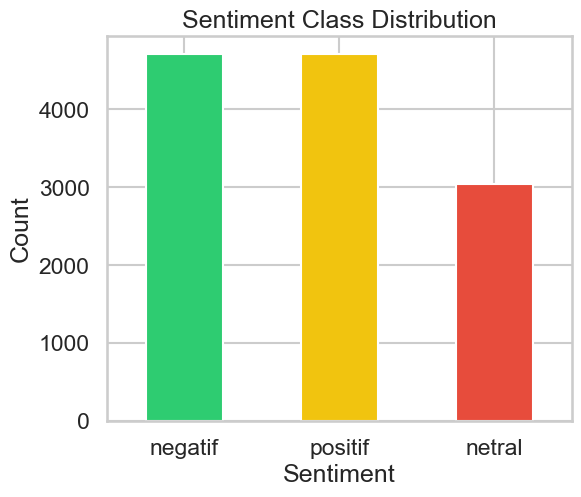

In [113]:
# -------------------------------
# Distribution of Sentiment Classes
# -------------------------------
plt.figure(figsize=(6,5))
df['inset_sentiment'].value_counts().plot(kind='bar', color=['#2ecc71', '#f1c40f', '#e74c3c'])
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


Sentence Length Statistics:
count    12458.000000
mean        18.996869
std         11.402532
min          1.000000
25%         10.000000
50%         15.000000
75%         28.000000
max         54.000000
Name: text_length, dtype: float64


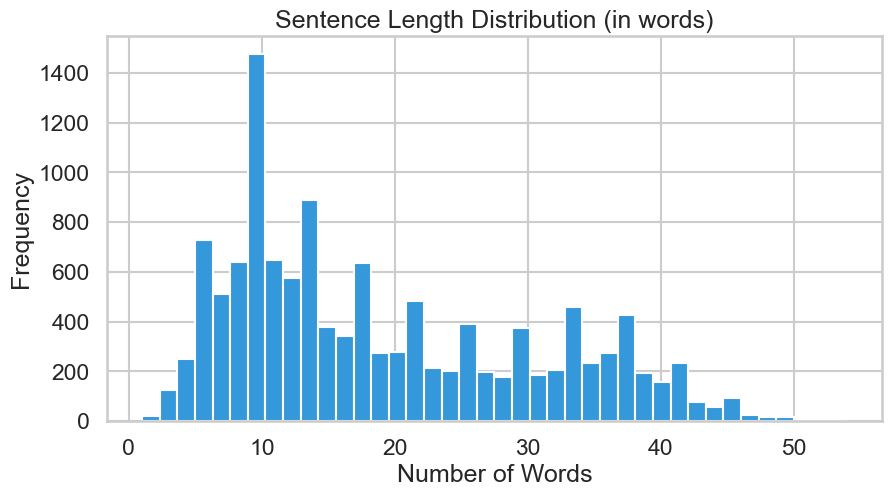

In [114]:
# -------------------------------
# Sentence Length Analysis
# -------------------------------
df['text_length'] = df['clean_text'].apply(lambda x: len(str(x).split()))
print("\nSentence Length Statistics:")
print(df['text_length'].describe())

plt.figure(figsize=(10,5))
plt.hist(df['text_length'], bins=40, color='#3498db')
plt.title("Sentence Length Distribution (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

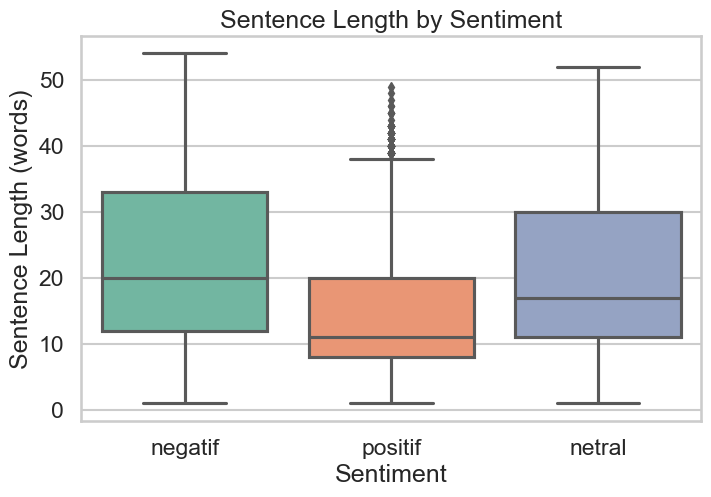

In [115]:
# -------------------------------
# Boxplot for Length by Sentiment
# -------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='inset_sentiment', y='text_length', data=df, palette='Set2')
plt.title("Sentence Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Sentence Length (words)")
plt.show()

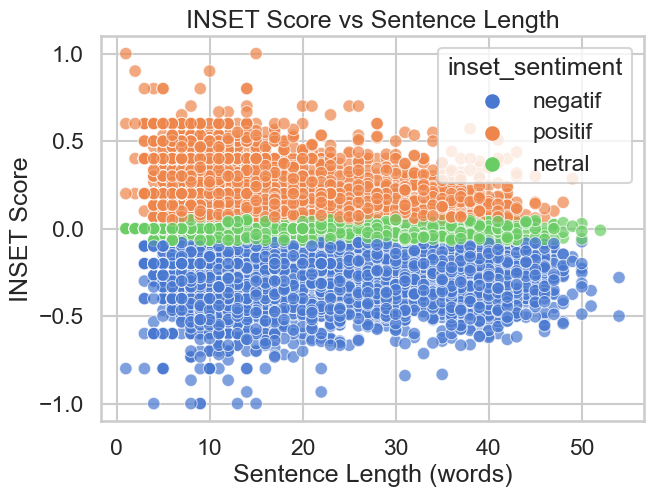

In [116]:
# -------------------------------
# Correlation between INSET Score & Length
# -------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x='text_length', y='inset_score', hue='inset_sentiment', data=df, alpha=0.7)
plt.title("INSET Score vs Sentence Length")
plt.xlabel("Sentence Length (words)")
plt.ylabel("INSET Score")
plt.show()

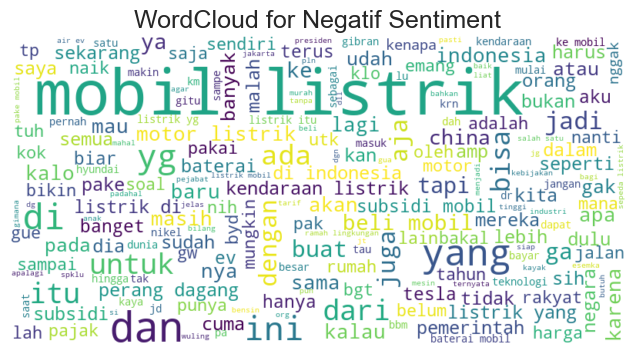

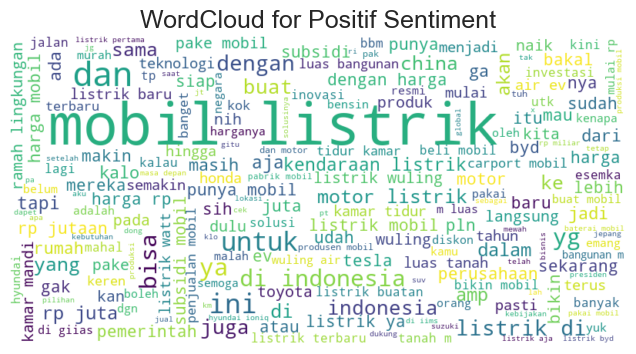

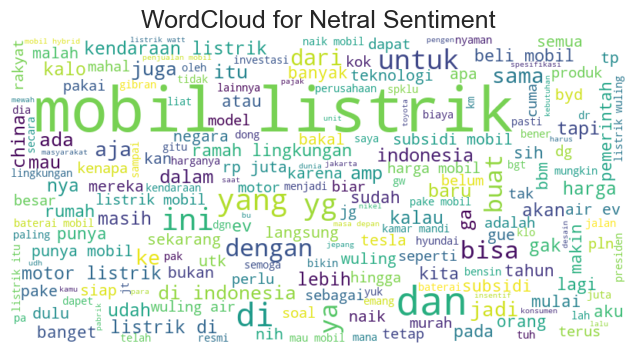

In [117]:
# -------------------------------
# Text Cleaning Function (for WordCloud)
# -------------------------------
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['cleaned_words'] = df['clean_text'].apply(clean_text)

# -------------------------------
# WordCloud per Sentiment
# -------------------------------
sentiments = df['inset_sentiment'].unique()
for sentiment in sentiments:
    subset = df[df['inset_sentiment'] == sentiment]
    text = ' '.join(subset['cleaned_words'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment.capitalize()} Sentiment")
    plt.show()


In [118]:
# -------------------------------
# Check for Duplicate Texts
# -------------------------------
duplicates = df.duplicated(subset=['clean_text']).sum()
print(f"\nNumber of duplicate clean_text entries: {duplicates}")


Number of duplicate clean_text entries: 0


In [121]:
# df.head()
df.columns

Index(['created_at', 'favorite_count', 'full_text', 'id_str', 'lang',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'text_len_chars', 'text_len_words', 'n_urls',
       'n_hashtags', 'n_mentions', 'n_emojis', 'clean_for_tokens',
       'engagement_sum', 'date', 'simple_lex', 'month', 'clean_text',
       'word_count', 'char_count', 'emoji_count', 'inset_score',
       'inset_sentiment', 'text_length', 'cleaned_words'],
      dtype='object')

In [123]:
df['inset_sentiment'].value_counts()

inset_sentiment
negatif    4707
positif    4707
netral     3044
Name: count, dtype: int64

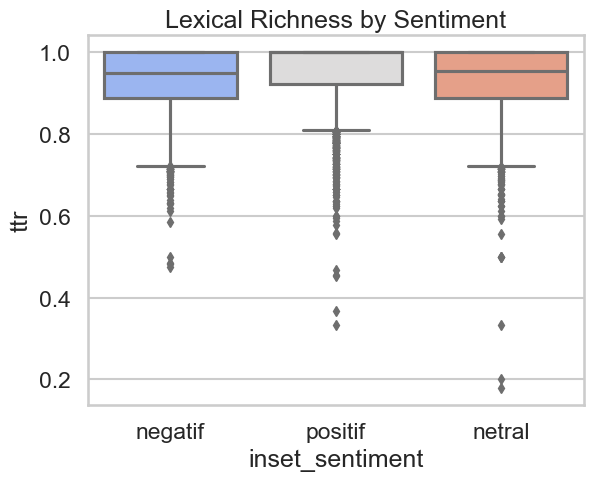

In [124]:
# 1. Lexical richness:

df['unique_words'] = df['clean_text'].apply(lambda x: len(set(x.split())))
df['ttr'] = df['unique_words'] / df['text_length']
sns.boxplot(x='inset_sentiment', y='ttr', data=df, palette='coolwarm')
plt.title('Lexical Richness by Sentiment')
plt.show()


In [125]:
# 2. Top frequent words by sentiment:

from collections import Counter
for sentiment in df['inset_sentiment'].unique():
    words = ' '.join(df[df['inset_sentiment']==sentiment]['cleaned_words']).split()
    common = Counter(words).most_common(20)
    print(f"\nTop 20 words for {sentiment}:")
    for w, c in common:
        print(f"{w}: {c}")



Top 20 words for negatif:
mobil: 4921
listrik: 4856
di: 1775
yang: 1406
dan: 1346
yg: 997
ini: 894
ada: 825
dari: 671
itu: 641
bisa: 627
untuk: 556
ke: 543
indonesia: 521
beli: 507
motor: 479
dengan: 455
jadi: 436
buat: 433
ga: 421

Top 20 words for positif:
mobil: 4893
listrik: 4850
di: 1587
dan: 900
indonesia: 601
ini: 551
harga: 511
ya: 499
untuk: 478
dengan: 465
rp: 440
motor: 373
bisa: 366
yg: 335
ev: 289
buat: 278
wuling: 269
china: 267
juta: 261
sama: 254

Top 20 words for netral:
mobil: 3476
listrik: 3325
di: 1153
dan: 790
ini: 554
yang: 462
yg: 450
indonesia: 399
bisa: 367
untuk: 353
dengan: 344
buat: 336
ya: 329
lebih: 318
harga: 291
ke: 278
dari: 277
motor: 266
sama: 251
ada: 248


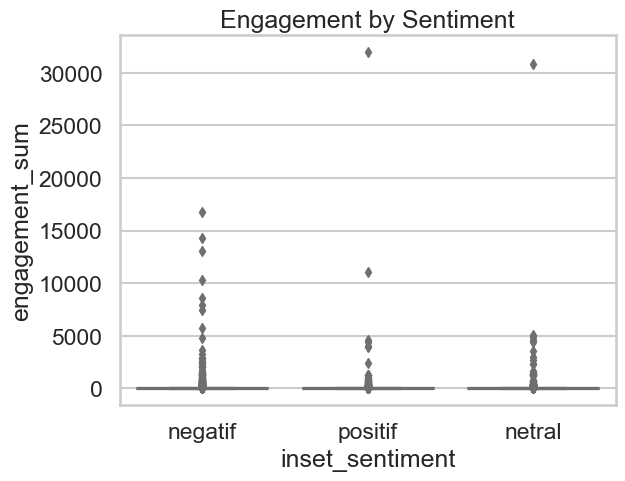

In [126]:
# 3. Engagement correlation:

sns.boxplot(x='inset_sentiment', y='engagement_sum', data=df, palette='pastel')
plt.title("Engagement by Sentiment")
plt.show()


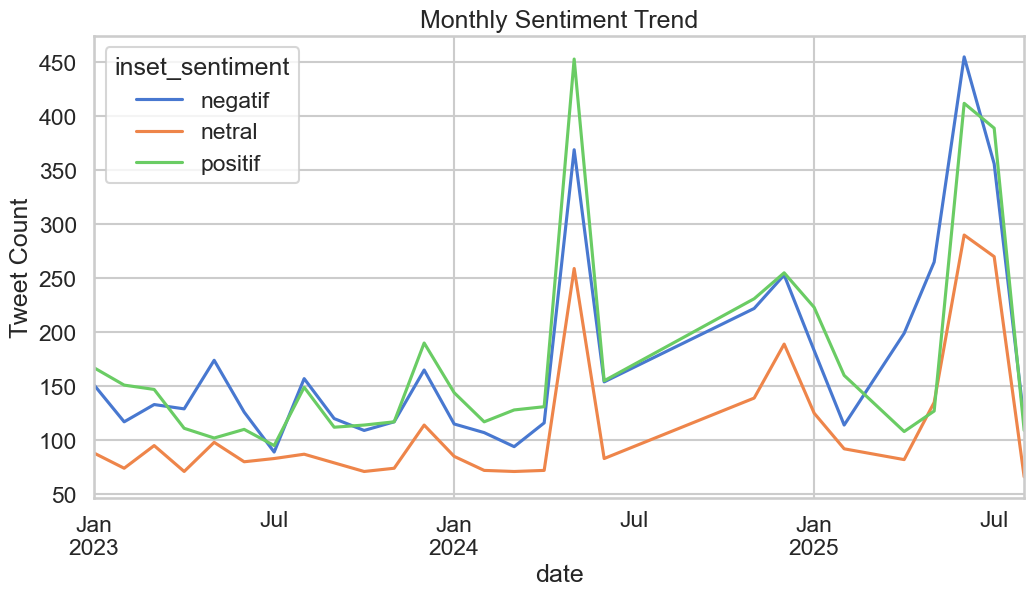

In [127]:
# 4. Temporal sentiment trend:

df['date'] = pd.to_datetime(df['date'])
sentiment_trend = df.groupby([df['date'].dt.to_period('M'), 'inset_sentiment']).size().unstack(fill_value=0)
sentiment_trend.plot(figsize=(12,6))
plt.title("Monthly Sentiment Trend")
plt.ylabel("Tweet Count")
plt.show()


    Make a new dataset having the relevant cols for training, {`clean_text` and `inset_sentiment`}

In [128]:
data = df[['clean_text','inset_sentiment']].copy()
data.head()

clean_text inset_sentiment
0  cuma jadi komoditas politik enginer malah di p...         negatif
1  pepetah tahun ini vaksin hilang mobil dan moto...         negatif
2   kalo mobil pertama ya jgn langsung mobil listrik         positif
3  iya tau kan pemerintah kita suka ga konsisten ...         negatif
4  harapannya dengan pasokan listrik ini hasil pr...         positif

### save your `3rd version of dataframe` to csv

In [129]:
# Save your 3rd version dataframe to CSV
data.to_csv(r"bersih_cleaned_text_Sentimentlabeled_updated.csv", index=False, encoding='utf-8')

In [ ]:
# df = data

---
# ==============================================================
# ==============================================================


**Entire workflow for cleaning and preparing Indonesian text:**

* **Indonesian needs extra care.** Words glue together, grammar’s loose, slang changes fast. Without cleanup, an NLP model will choke on noise.
* **Core cleaning steps:**

  1. **Case folding** – make everything lowercase.
  2. **Remove punctuation and numbers** if they don’t carry meaning.
  3. **Trim whitespace.**
  4. **Remove stopwords** like *yang, dan, di,* etc.
  5. **Tokenize** – split text into words.
  6. **Stem or lemmatize** – reduce *memasak, masakan* → *masak.*
  7. **Handle slang and negation** – *gue → saya,* and treat *tidak suka* carefully.
* **Tools:** mainly *Sastrawi* for stemming and stopword removal, *NLTK* for tokenizing, maybe *SpaCy* or *Gensim* for higher-level work.
* **Pitfalls:** over-stemming (too aggressive), dialect variety, evolving slang, and ambiguous meaning.
* **Bottom line:** cleaner text = more accurate sentiment or translation models.
